<a href="https://colab.research.google.com/github/jagtapdinesh17/Linear-Regression---Bike-Sharing-Demand-Prediction/blob/main/Bike_sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -** Dinesh Shivaji Jagtap


# **Project Summary -**

To increase convenience and mobility, bike rentals are now widely available in urban areas. A reliable supply of rental bikes is a big concern because ensuring prompt access to them is essential to cutting down on public wait times. In this regard, the anticipated hourly bicycle count is especially important.
This dataset uses previous usage trends, including temperature, time, and other information, to forecast demand for Seoul's bike sharing programme.

*   **In the given dataset there are total 8760 records and 14 columns**
*   **First step towards project is to load the dataset and import the required liabraries for performing EDA**

*   **Checked the first view of dataset using head, tail and sample method**
*   **Checked the null and duplicate value and visualized the same using heatmap**

*   **Done the data wrangling process on data to make data compatible for machine learning model**
*   **Checked the distribution of target variable rented bike count and handled the class imbalence using square root method**

*   **Treated the outliers using VIF method for independent variable**
*   **Performed EDA of each variables and analyze the trend with target variable**

*   **Finally cleaned and scaled data provided to variour models,the metrics were made to evaluate the model**
*  **While developing the machine learning model, it is recommended to check multiple models but mainly we are focusing on R2 score and RMSE score**

*   **In machine learning, R2 score is a popular evaluation metric used to assess the performance of regression models. It provides an indication of how well the model fits the data, with values ranging from 0 to 1.**
*   **The importance of R2 score in machine learning lies in its ability to help determine the accuracy and generalization of the model. A high R2 score indicates that the model is able to explain a large portion of the variation in the data and is likely to generalize well to new data. On the other hand, a low R2 score indicates that the model is not able to capture the relationships between the variables and may not perform well on new data.**

















# **GitHub Link -**

https://github.com/jagtapdinesh17/Linear-Regression---Bike-Sharing-Demand-Prediction

# **Problem Statement**


1.   **Currently Rental Bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as ot lessons the waiting time. Evetually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**


2.   **Through a network of stations, bike sharing systems automate membership, rentals, and bike returns. It is possible for people to hire bicycles at one spot and return them at a different or the same location as needed. Bike rentals are facilitated by membership or request, and the operation is managed by an automated retail network spanning the entire city.**

3.  **This dataset uses previous usage trends, including temperature, time, and other information, to forecast demand for Seoul's bike sharing programme.**





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process 
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [2]:
# Load Dataset
#let's mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the Seol bike data set from the drive
df_bike = pd.read_csv('/content/drive/MyDrive/ML-BIKE SHARING DEMAND PREDICTION/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [4]:
# Dataset First Look
df_bike.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [5]:
df_bike.tail(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8750  30/11/2018                761    14              7.8           20   
8751  30/11/2018                768    15              7.0           20   
8752  30/11/2018                837    16              7.2           23   
8753  30/11/2018               1047    17              6.0           29   
8754  30/11/2018               1384    18              4.7           34   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8750               2.2              2000                      -13.8   
8751               3.3              1994                      -14.4   
8752               1.5              1945                      -12.6   
8753               2.1              1877                      -10.7   
8754               1.9              1661                       -9.8   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8750                     1.67           0.0            0.0  Autumn   
8751                     1.21           0.0            0.0  Autumn   
8752                     0.72           0.0            0.0  Autumn   
8753                     0.23           0.0            0.0  Autumn   
8754                     0.00           0.0            0.0  Autumn   
8755                     0.00           0.0            0.0  Autumn   
8756                     0.00           0.0            0.0  Autumn   
8757                     0.00           0.0            0.0  Autumn   
8758                     0.00           0.0            0.0  Autumn   
8759                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
8750  No Holiday             Yes  
8751  No Holiday             Yes  
8752  No Holiday             Yes  
8753  No Holiday             Yes  
8754  No Holiday             Yes  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [6]:
df_bike.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8361  14/11/2018               1019     9              7.1           61   
3835  09/05/2018               2405    19             18.8           47   
1325  25/01/2018                 34     5            -15.8           37   
8306  12/11/2018                187     2              4.8           66   
4520  07/06/2018               2317     8             18.9           82   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8361               0.5              1493                        0.0   
3835               2.8              1988                        7.2   
1325               2.7              2000                      -27.1   
8306               1.6              2000                       -1.0   
4520               2.3               326                       15.7   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8361                     0.57           0.0            0.0  Autumn   
3835                     0.40           0.0            0.0  Spring   
1325                     0.00           0.0            0.7  Winter   
8306                     0.00           0.0            0.0  Autumn   
4520                     0.44           0.0            0.0  Summer   

         Holiday Functioning Day  
8361  No Holiday             Yes  
3835  No Holiday             Yes  
1325  No Holiday             Yes  
8306  No Holiday             Yes  
4520  No Holiday             Yes

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df_bike.shape

(8760, 14)

In [8]:
print(f'number of rows : {df_bike.shape[0]}  \nnumber of columns : {df_bike.shape[1]}')

number of rows : 8760  
number of columns : 14


### Dataset Information

In [9]:
# Dataset Info
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **We have 14 column in dataset , in this 4 are catagorical and others are numerical columns**

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicate_value = len(df_bike[df_bike.duplicated()])
print('The total duplicate values in dataset are {}'.format(duplicate_value))

The total duplicate values in dataset are 0


**No duplicate value found in this dataset**

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print(df_bike.isna().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

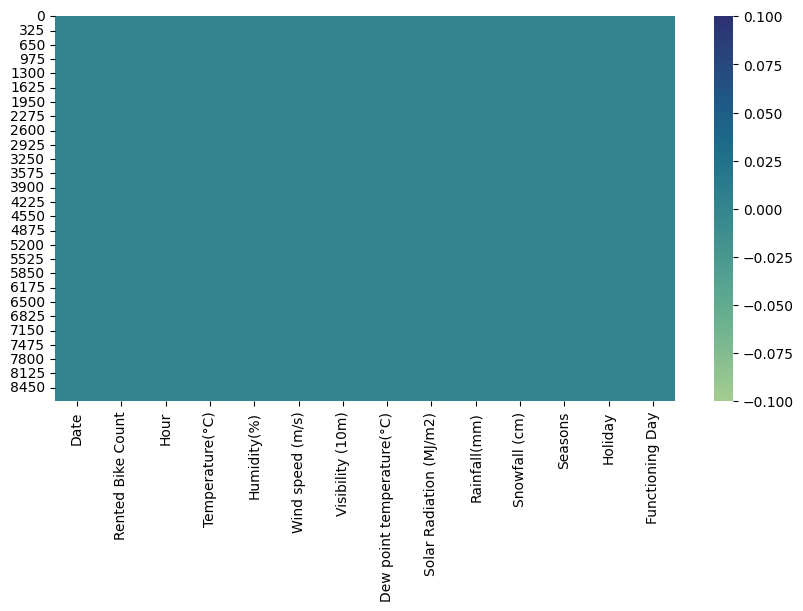

In [12]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df_bike.isna(), cmap = 'crest')

**From the above heatmap it is clear that there is no null value present in dataset, Data is clean and clear**

### What did you know about your dataset?



1.   Provided dataset containes 14 columns and 8760 rows
2.   Dataset does not have any null or duplicate value

3.   10 columns are numerical values and remaining 4 are catagorical values





## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df_bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
# Dataset Describe
df_bike.describe(include = 'all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Variables Description 

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :** No Functioning(Non Functional Hours), Functioning(Functional hours)

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df_bike.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [16]:
for i in df_bike.columns.tolist():
  print(" unique values in",i,"is",df_bike[i].nunique())

 unique values in Date is 365
 unique values in Rented Bike Count is 2166
 unique values in Hour is 24
 unique values in Temperature(°C) is 546
 unique values in Humidity(%) is 90
 unique values in Wind speed (m/s) is 65
 unique values in Visibility (10m) is 1789
 unique values in Dew point temperature(°C) is 556
 unique values in Solar Radiation (MJ/m2) is 345
 unique values in Rainfall(mm) is 61
 unique values in Snowfall (cm) is 51
 unique values in Seasons is 4
 unique values in Holiday is 2
 unique values in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# 1st need to rename the column to make simple name for accesing the data 

In [18]:
df_bike=df_bike.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

In [19]:
df_bike.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day'],
      dtype='object')

In [20]:
# extracting the day, month and year from date column 

In [21]:
df_bike.date = pd.to_datetime(df_bike.date)

In [22]:
df_bike['day'] = df_bike['date'].dt.day
df_bike['month'] = df_bike['date'].dt.month
df_bike['year'] = df_bike['date'].dt.year
df_bike['weekday'] = df_bike['date'].dt.day_name()

In [23]:
# Let's now drop the date column by using the drop methods

In [24]:
df_bike.drop('date', axis = 1 , inplace = True)

In [25]:
df_bike.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

'Hour' column follows clear sequence for clear EDA purposes we will convert the 'Hour' column into catagorical variables and then we will lable it.

In [26]:
def hour_cat(x):
   
    ''' 
    'Hour' column follows clear sequence for clear EDA purposes we will convert 
    the 'Hour' column into catagorical variables and then we will lable it.
    '''
    
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
df_bike['hour_cat'] = df_bike['hour'].apply(hour_cat)

In [27]:
df_bike.head()

rented_bike_count  hour  temperature  humidity  wind_speed  visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   dew_point_temperature  solar_radiation  rainfall  snowfall seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      holiday functioning_day  day  month  year   weekday    hour_cat  
0  No Holiday             Yes   12      1  2017  Thursday  Late Night  
1  No Holiday             Yes   12      1  2017  Thursday  Late Night  
2  No Holiday             Yes   12      1  2017  Thursday  Late Night  
3  No Holiday             Yes   12      1  2017  Thursday  Late Night  
4  No Holiday             Yes   12      1  2017  Thursday  Late Night

### What all manipulations have you done and insights you found?

1.   Column name has been changed for the simplicity of the data
2.   Date column has been bifurgated and date, month, year extracted from the same and date column droped from the main dataset

3.   'Hour' column follows clear sequence for clear EDA purposes we will convert the 'Hour' column into catagorical variables and then we will lable it.






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Target Variable - Rented Bike Count

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Tuesday')])

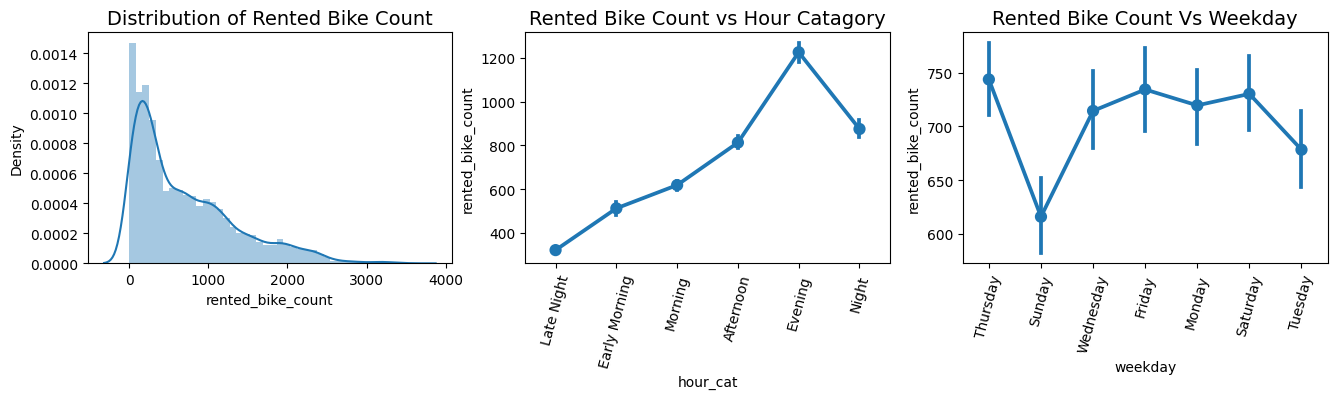

In [28]:
# Chart - 1 visualization code
fig, ax = plt.subplots(1,3, figsize = (16,3))

# Distribution analysis
dist = sns.distplot(df_bike['rented_bike_count'], ax=ax[0])
dist.set_title('Distribution of Rented Bike Count', size = 14)

# Bi-variate analysis
# Rented Bike Count vs Hour Catagory
line = sns.pointplot(x='hour_cat',y='rented_bike_count', data=df_bike, ax=ax[1])
line.set_title('Rented Bike Count vs Hour Catagory', size = 14)
line.set_xticklabels(line.get_xticklabels(), rotation=75)

# Bi-variate analysis
# Rented Bike Count Vs Weekday
point = sns.pointplot(data=df_bike, x='weekday', y='rented_bike_count', ax=ax[2])
point.set_title('Rented Bike Count Vs Weekday', size=14)
# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=75)

##### 1. Why did you pick the specific chart?



*   Point plot clearly shows the distribution of the rentend bike along with hour and weekdays




##### 2. What is/are the insight(s) found from the chart?

*   Distribution of rented bike count is positively skewed.
*   Demand for rented bike is increased at evening 

*   And demand on sunday is very less







##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - **Hour**

[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, ' Rented Bike Count'),
 Text(0.5, 1.0, 'Average Bike Rented Vs Hour with year')]

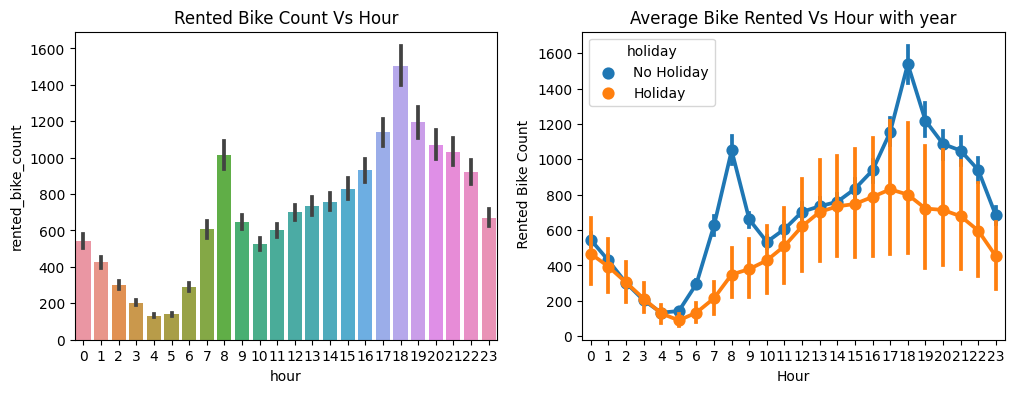

In [29]:
# Chart - 2 visualization code
# Bi-variate analysis 
fig,ax = plt.subplots(1,2,figsize=(12,4))

# Rented Bike Count Vs Hour
bar = sns.barplot(x='hour', y='rented_bike_count',data=df_bike, ax = ax[0])
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
bar.set_title('Rented Bike Count Vs Hour')

# Multi-variate analysis
point = sns.pointplot(data=df_bike, x='hour', y='rented_bike_count', hue='holiday', ax= ax[1])
point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')


##### 1. Why did you pick the specific chart?



1.   Bar plot and line plot clarly shows the distribution of the variables






##### 2. What is/are the insight(s) found from the chart?

1.   Rentend bike demand increses at 8AM and 6PM during business hour
2.   Rented bike follows two pattern for holiday and no-holiday

3.   For working day demand for bike is high during the business hour






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.



*   **Yes, gained insights help to manage the count of bike during the specific time of day**



#### Chart - 3 - **Temperature**

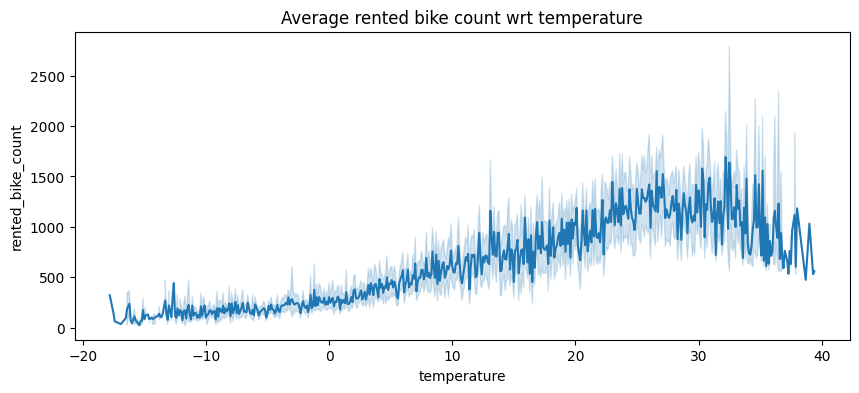

In [30]:
# Chart - 3 visualization code
plt.figure(figsize = (10,4))
# Rented Bike count vs Temperature
line = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = df_bike)
line.set_title('Average rented bike count wrt temperature')
plt.show()


##### 1. Why did you pick the specific chart?

*   Line chart gives the clear understanding of distribution of temperature vs rental bike count



##### 2. What is/are the insight(s) found from the chart?

*   It is observed that rented bike count demand increses when temperature is increses but for high temperature demand slightely decreases.
*   So we can say people prefere bike in warm temperature, not to cold or not to hot 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


*   This insights help us to manage the count of bike with the temperature



#### Chart - 4 - **Humidity**

Text(0, 0.5, 'Rented Bike Count')

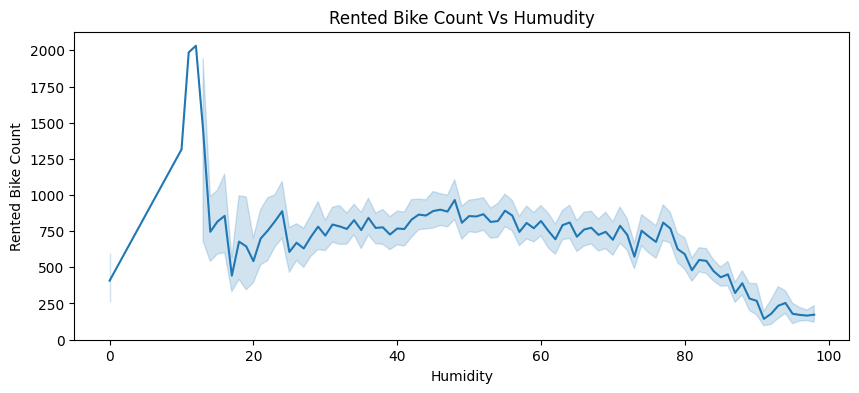

In [31]:
# Chart - 4 visualization code
plt.figure(figsize = (10,4))

sns.lineplot(x='humidity',y='rented_bike_count',data = df_bike)
plt.title('Rented Bike Count Vs Humudity')
plt.xlabel('Humidity')
plt.ylabel('Rented Bike Count')


##### 1. Why did you pick the specific chart?

*   Line chart gives the clear understanding of distribution of humidity vs rental bike count

##### 2. What is/are the insight(s) found from the chart?

*   Most preferred environmenet is 20 to 90 humidity



#### Chart - 5 - **Wind Speed**

[Text(0.5, 0, 'Wind Speed'),
 Text(0, 0.5, ' Rented Bike Count'),
 Text(0.5, 1.0, 'Average Bike Rented Vs Wind Speed')]

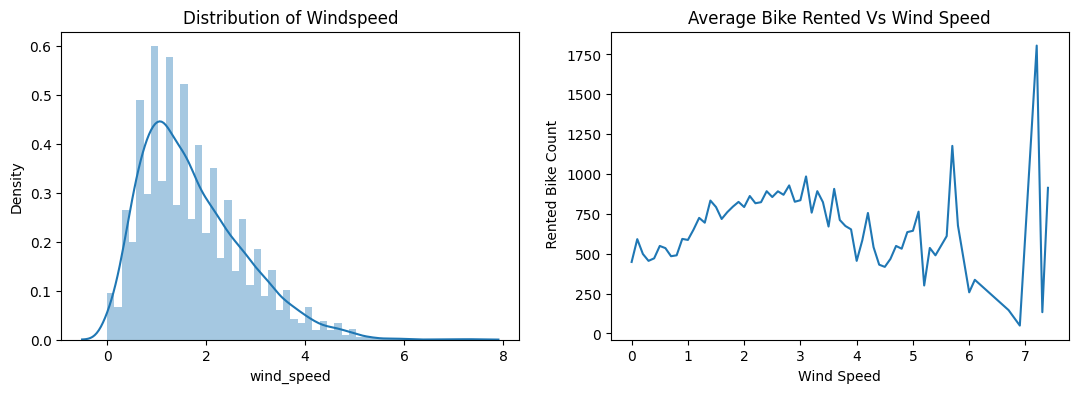

In [32]:
# Chart - 5 visualization code
fig,ax = plt.subplots(1,2,figsize = (13,4))

# Univariate analysis
dist = sns.distplot(df_bike.wind_speed, ax = ax[0])
dist.set_title('Distribution of Windspeed')

#Bi-variate analysis 
# Line Plot
group_wind_speed = df_bike.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[1])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

##### 1. Why did you pick the specific chart?

*   Dist plot shows the distribution of the variable 
*   Line plot clearly shows the relationship between dependent and independent variable



##### 2. What is/are the insight(s) found from the chart?

*   Distribution of the windspeed is slightely right skeweed, we will treat it later 
*   We can say people prefers moderate windspeed but at 7 it is very high exceptionaly



#### Chart - 6 - **Visibility**

Text(0.5, 1.0, 'Scatter Plot of Rented Bike Count Vs Visibility')

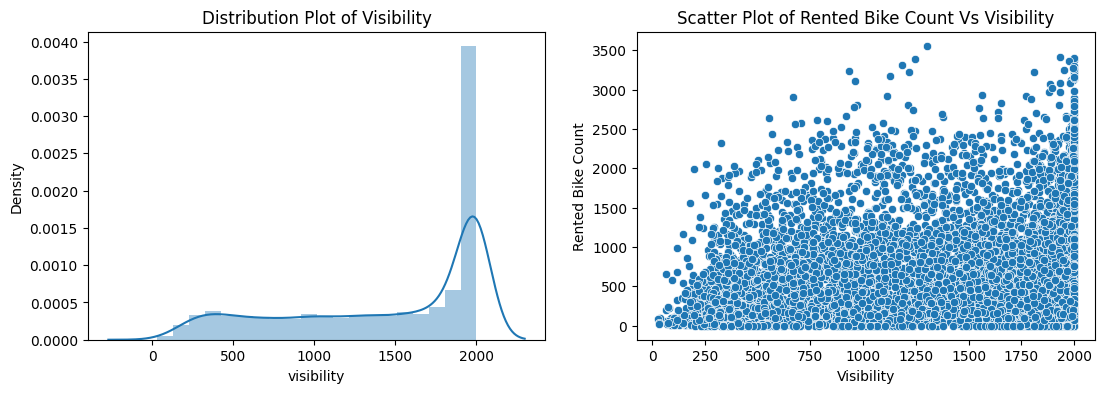

In [33]:
# Chart - 6 visualization code
fig,ax = plt.subplots(1,2, figsize=(13,4))

# Univariate analysis
dist = sns.distplot(df_bike.visibility, ax = ax[0])
dist.set_title('Distribution Plot of Visibility')

# Bi-variate analysis 
# Rented Bike Count Vs Visibility
sns.scatterplot(x='visibility', y='rented_bike_count', data=df_bike, ax = ax[1])
plt.xlabel('Visibility')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot of Rented Bike Count Vs Visibility')

##### 1. Why did you pick the specific chart?

*   Dist plot shows the distribution of the variable
*   Scatter plot shows scattering of the varibales against the rented bike count



##### 2. What is/are the insight(s) found from the chart?

*   Visibility is hightely left skewed
*   As visibility increases demand of rented bike also increases



#### Chart - 7 - **Dew Point Temperature**

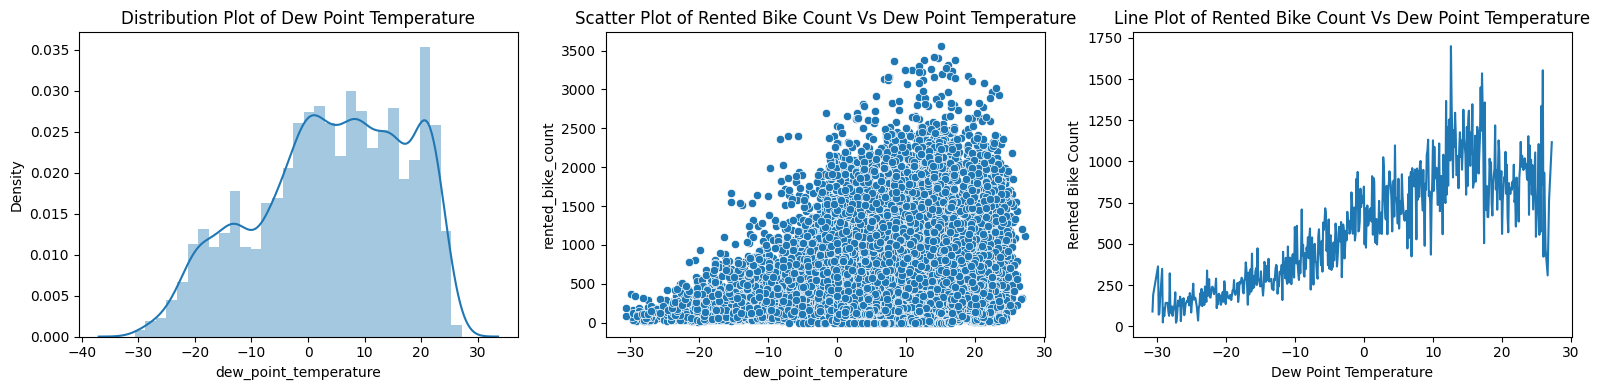

In [34]:
# Chart - 7 visualization code
fig,ax = plt.subplots(1,3, figsize=(16,4))

# Univariate analysis
dist = sns.distplot(df_bike.dew_point_temperature, ax = ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

# Bi-variate analysis 
# Rented Bike Count Vs Dew Point Temperature
scatter = sns.scatterplot(x='dew_point_temperature', y='rented_bike_count', data=df_bike, ax = ax[1])
plt.xlabel('Dew Point Temperature') 
plt.ylabel('Rented Bike Count') 
scatter.set_title('Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

# Line Plot
group_dew_point_temperature = df_bike.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count', ax= ax[2])
plt.xlabel('Dew Point Temperature') 
plt.ylabel('Rented Bike Count') 
plt.title('Line Plot of Rented Bike Count Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*   Scatter plot shows the distribution of variables on different points




##### 2. What is/are the insight(s) found from the chart?


*   Distribution of dew point temperature found slightely skewed on negative side
*   Line plot followed pattern same as temperature , as dew point temperature increases the rented bike count demand increases but at high dew point temperature the demand is decreased



#### Chart - 8 - **Solar Radiation**

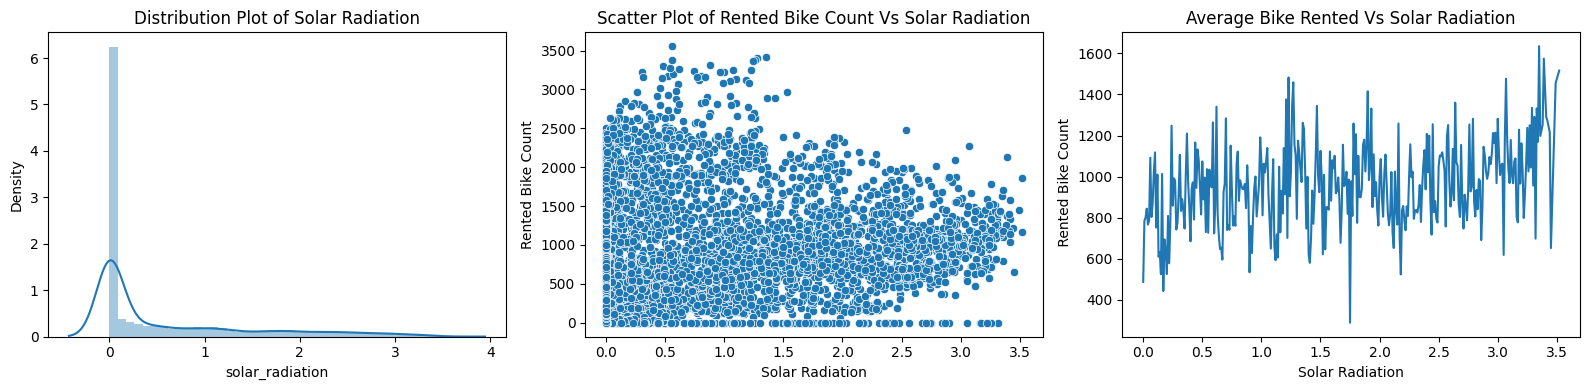

In [35]:
# Chart - 8 visualization code
fig,ax = plt.subplots(1,3, figsize=(16,4))

# Univariate analysis
dist = sns.distplot(df_bike.solar_radiation, ax = ax[0])
dist.set_title('Distribution Plot of Solar Radiation')

# Bi-variate analysis 
# Rented Bike Count Vs Solar Radiation
scatter = sns.scatterplot(x='solar_radiation', y='rented_bike_count', data=df_bike, ax = ax[1])
scatter.set(xlabel='Solar Radiation', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Solar Radiation')

# Line Plot
group_solar_radiation = df_bike.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Solar Radiation', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Solar Radiation')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*   Scatter plot shows the distribution of variables on different points


##### 2. What is/are the insight(s) found from the chart?

*   Distribution of solar radiation is right skewed 
*   And as per line and scatter plot it it found that as solar radiation increases demand of rented bike also increases



#### Chart - 9 - **Rainfall**

[Text(0.5, 0, 'Rainfall'),
 Text(0, 0.5, 'Rented Bike Count'),
 Text(0.5, 1.0, 'Scatter Plot of Rented Bike Count Vs Rainfall')]

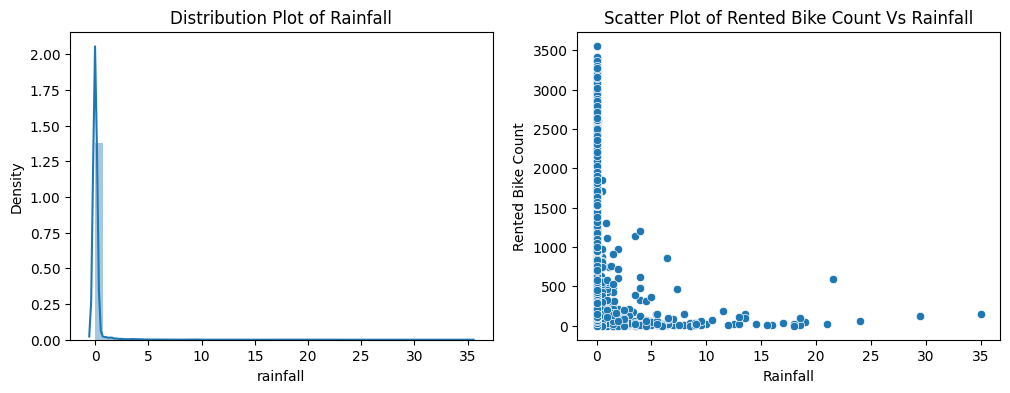

In [36]:
# Chart - 9 visualization code
fig,ax = plt.subplots(1,2, figsize=(12,4))

# Univariate analysis
dist = sns.distplot(df_bike.rainfall, ax = ax[0])
dist.set_title('Distribution Plot of Rainfall')

# Bi-variate analysis 
# Rented Bike Count Vs Rainfall
scatter = sns.scatterplot(x='rainfall', y='rented_bike_count', data=df_bike, ax = ax[1])
scatter.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')


##### 1. What is/are the insight(s) found from the chart?

*   Distribution of rainfall is very much right skewed
*   And as per scatter plot it is clear that people do not prefer the bike in rainfall



#### Chart - 10 - **Snowfall**

[Text(0.5, 0, 'Snowfall'),
 Text(0, 0.5, 'Rented Bike Count'),
 Text(0.5, 1.0, 'Scatter Plot of Rented Bike Count Vs Snowfall')]

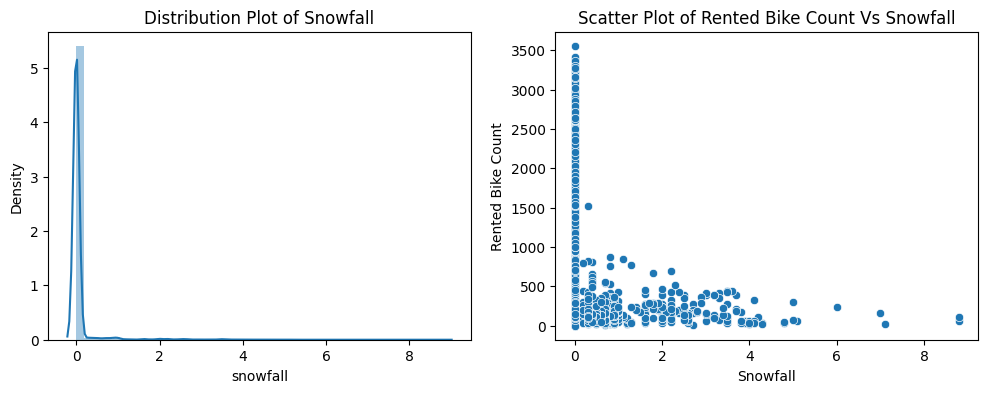

In [37]:
# Chart - 10 visualization code
fig,ax = plt.subplots(1,2, figsize=(12,4))

# Univariate analysis
dist = sns.distplot(df_bike.snowfall, ax = ax[0])
dist.set_title('Distribution Plot of Snowfall')

# Bi-variate analysis 
# Rented Bike Count Vs Snowfall
scatter = sns.scatterplot(x='snowfall', y='rented_bike_count', data=df_bike, ax = ax[1])
scatter.set(xlabel='Snowfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')


##### 1. What is/are the insight(s) found from the chart?



*   Distribution of snowfall is very much right skewed

*   And as per scatter plot it is clear that people do not prefer the bike in snowfall



#### Chart - 11 - **Seasons**

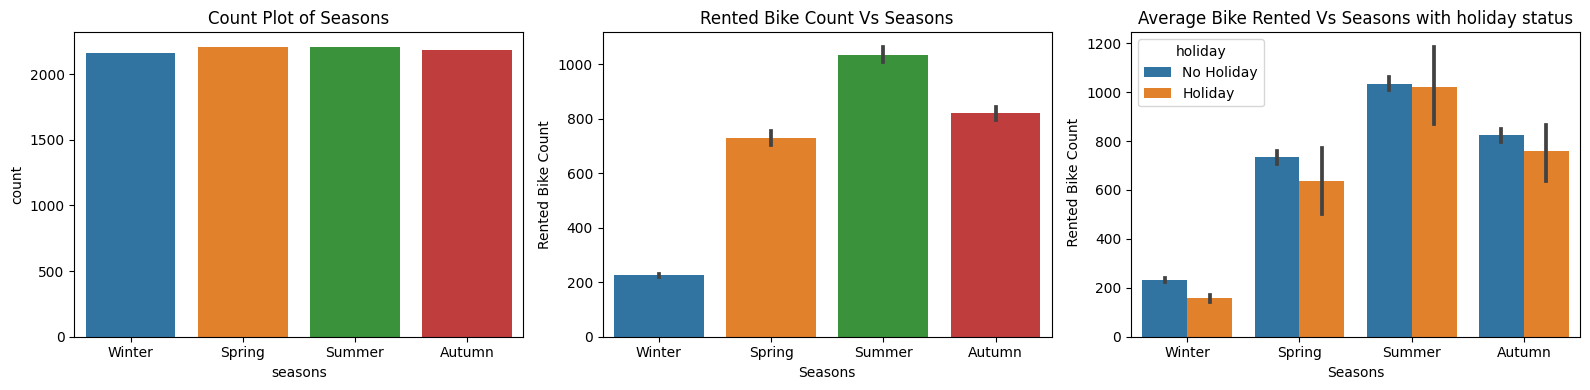

In [38]:
# Chart - 11 visualization code

fig,ax = plt.subplots(1,3, figsize=(16,4))

# Univariate analysis
count = sns.countplot(x='seasons',data=df_bike, ax=ax[0])
count.set_title('Count Plot of Seasons')

# Bi-variate analysis 
# Rented Bike Count Vs Seasons
bar = sns.barplot(x='seasons', y='rented_bike_count', data=df_bike, ax = ax[1])
bar.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Rented Bike Count Vs Seasons')

# Multi-variate analysis
cat = sns.barplot(x='seasons', y='rented_bike_count', data=df_bike, hue='holiday', ax= ax[2])
cat.set(xlabel='Seasons', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

*   Bar chart clearly shows the distribution of two variables 




##### 2. What is/are the insight(s) found from the chart?

*   The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.

*   Demand on working day is high than the holiday






#### Chart - 12 - **Functioning Day**

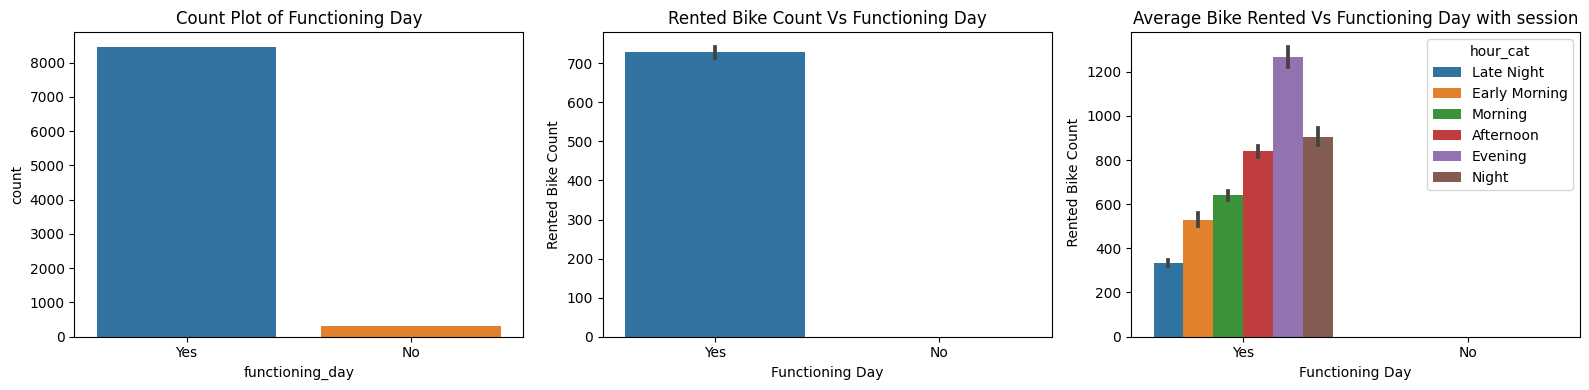

In [39]:
# Chart - 12 visualization code
fig,ax = plt.subplots(1,3, figsize=(16,4))

# Univariate analysis
count = sns.countplot(x='functioning_day', data=df_bike, ax=ax[0])
count.set_title('Count Plot of Functioning Day')

# Bi-variate analysis 
# Rented Bike Count Vs Functioning Day
bar = sns.barplot(x='functioning_day', y='rented_bike_count', data=df_bike,  ax = ax[1])
bar.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Rented Bike Count Vs Functioning Day')

# Multi-variate analysis
cat = sns.barplot(x='functioning_day', y='rented_bike_count', hue='hour_cat', data=df_bike,  ax= ax[2])
cat.set(xlabel='Functioning Day', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Functioning Day with session')

plt.tight_layout()
plt.show()

##### 1. What is/are the insight(s) found from the chart?

*   No any bike rented on no functioning day
*   At evening session more of the bike are rented 



#### Chart - 13 - Correlation Heatmap

<Axes: >

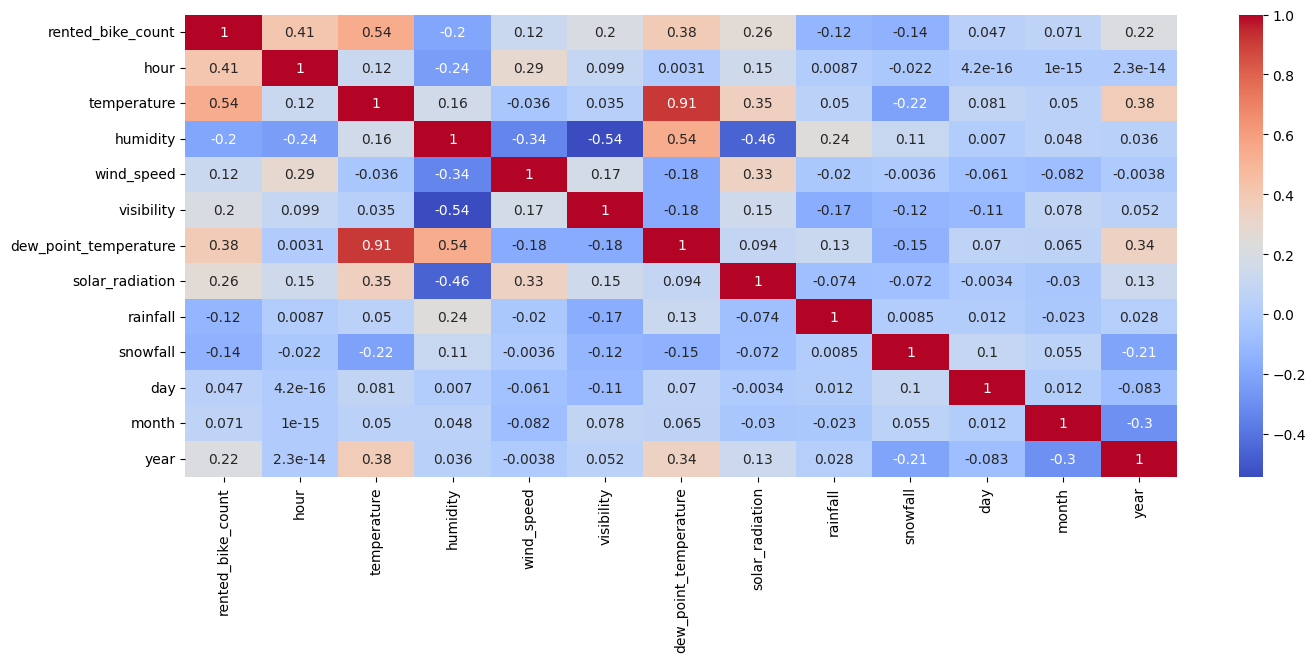

In [40]:
# Correlation Heatmap visualization code

plt.figure(figsize=(16,6))
sns.heatmap(df_bike.corr(), annot=True, cmap='coolwarm')  

##### 1. Why did you pick the specific chart?

*   To check the co-relation of the variables to each others




##### 2. What is/are the insight(s) found from the chart?


*   Dew point temperature is highly co-related with temperature , we will treat it later



## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_bike.isnull().sum())

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
day                      0
month                    0
year                     0
weekday                  0
hour_cat                 0
dtype: int64


In [42]:
# counting duplicate values
df_bike.duplicated().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

*   There is no any null value present in dataset
*   There is no duplicate value in dataset



### 2. Handling Outliers

In [43]:
# Handling Outliers & Outlier treatments
# Let's check the summary of the data
df_bike.describe().T

count         mean         std     min      25%  \
rented_bike_count      8760.0   704.602055  644.997468     0.0   191.00   
hour                   8760.0    11.500000    6.922582     0.0     5.75   
temperature            8760.0    12.882922   11.944825   -17.8     3.50   
humidity               8760.0    58.226256   20.362413     0.0    42.00   
wind_speed             8760.0     1.724909    1.036300     0.0     0.90   
visibility             8760.0  1436.825799  608.298712    27.0   940.00   
dew_point_temperature  8760.0     4.073813   13.060369   -30.6    -4.70   
solar_radiation        8760.0     0.569111    0.868746     0.0     0.00   
rainfall               8760.0     0.148687    1.128193     0.0     0.00   
snowfall               8760.0     0.075068    0.436746     0.0     0.00   
day                    8760.0    15.720548    8.796749     1.0     8.00   
month                  8760.0     6.526027    3.448048     1.0     4.00   
year                   8760.0  2017.915068    0.278796  2017.0  2018.00   

                           50%      75%      max  
rented_bike_count       504.50  1065.25  3556.00  
hour                     11.50    17.25    23.00  
temperature              13.70    22.50    39.40  
humidity                 57.00    74.00    98.00  
wind_speed                1.50     2.30     7.40  
visibility             1698.00  2000.00  2000.00  
dew_point_temperature     5.10    14.80    27.20  
solar_radiation           0.01     0.93     3.52  
rainfall                  0.00     0.00    35.00  
snowfall                  0.00     0.00     8.80  
day                      16.00    23.00    31.00  
month                     7.00    10.00    12.00  
year                   2018.00  2018.00  2018.00

*   As per above summary for numerical features, there is significant difference between 75% percentile and maximum value . It is clear that dataset contains skewness and outliers




*   **Splitting Numerical and Catagorical Features**




In [44]:
numerical_features = ['rented_bike_count','temperature','humidity','wind_speed','visibility','dew_point_temperature','solar_radiation',
                      'rainfall','snowfall']

In [45]:
catagorical_features = ['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'year', 'weekday']

In [46]:
# Our target variable is rented_bike_count we do not want any transformation as of now in numerical features
numerical_features.remove('rented_bike_count')

# Also rainfall and snowfall are very highly skewed so we will remove this column 
numerical_features.remove('rainfall')
numerical_features.remove('snowfall')

In [47]:
numerical_features

['temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temperature',
 'solar_radiation']

# **5.1 : Distribution of Numerical Features**

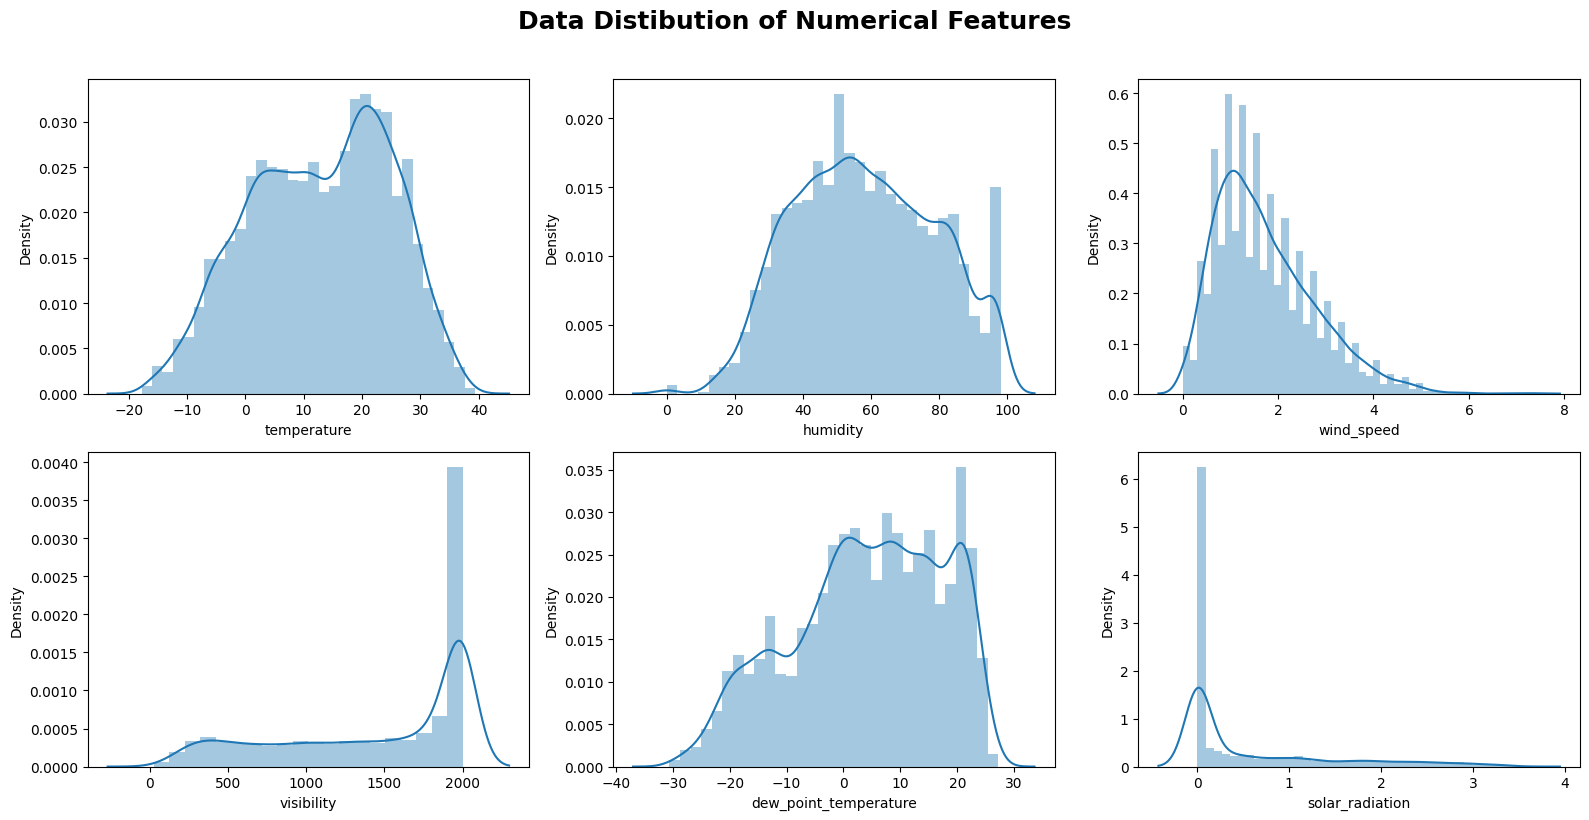

In [48]:
# figsize
plt.figure(figsize=(16,8))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=18, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                       # subplots 2 rows, 3 columns

  # dist plots
  sns.distplot(df_bike[col])  
  # x-axis label
  plt.xlabel(col)  
  plt.tight_layout()


*   Some of the numerical features are right skewed
*   And some of the features are left skewed

*   We need to treat this outlier to get the proper result






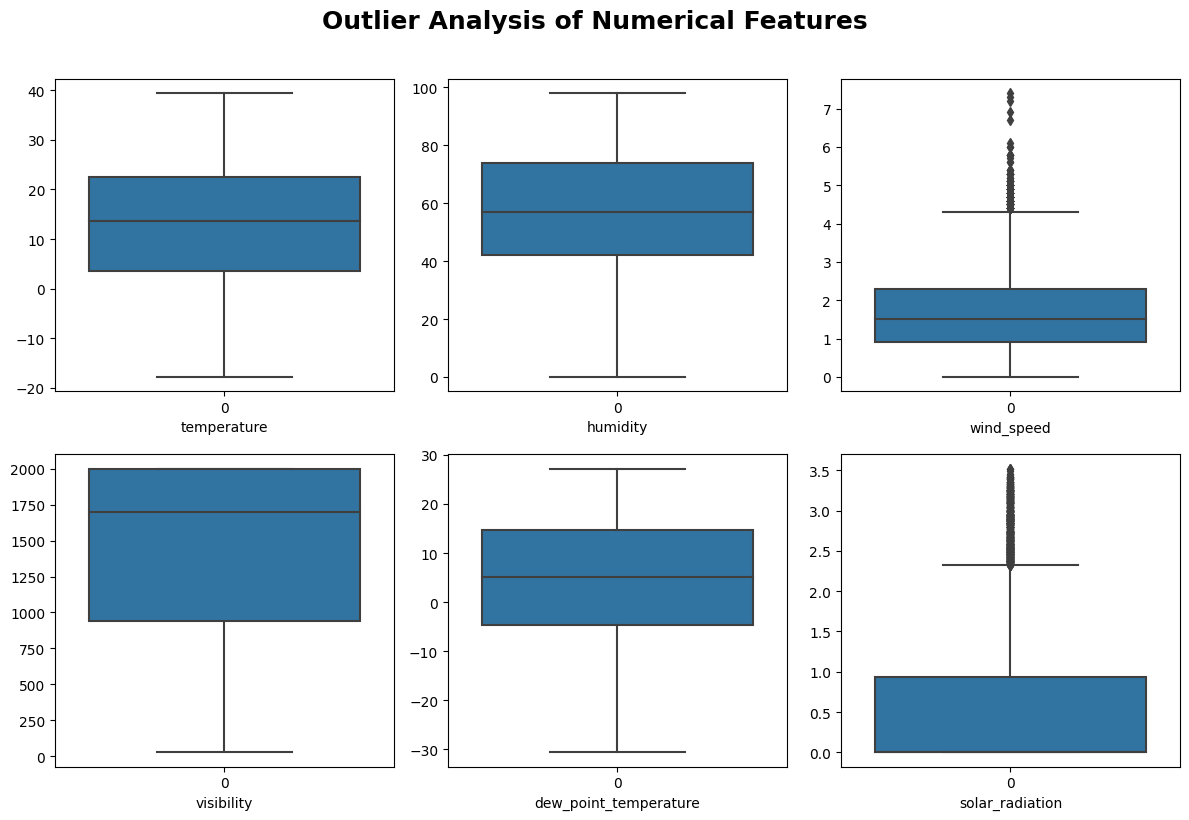

In [49]:
# figsize
plt.figure(figsize=(12,8))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=18, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)            # subplot of 2 rows and 3 columns

  # countplot
  sns.boxplot(df_bike[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

*   We found that outlier clearly visible in solar radiation  and windspeed
*   We will treat them by using clipping method because we have limited data point in datasets



In [50]:
# We will replace the datapoint with upper and lower limit 

def cliping_outliers(df_bike):
    for col in df_bike[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df_bike[col].quantile(0.25)
        q3 = df_bike[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        df_bike[col] = df_bike[col].clip(lower_bound, upper_bound)
    return df_bike

In [51]:
# Using the function to treat outliers
df_bike = cliping_outliers(df_bike)

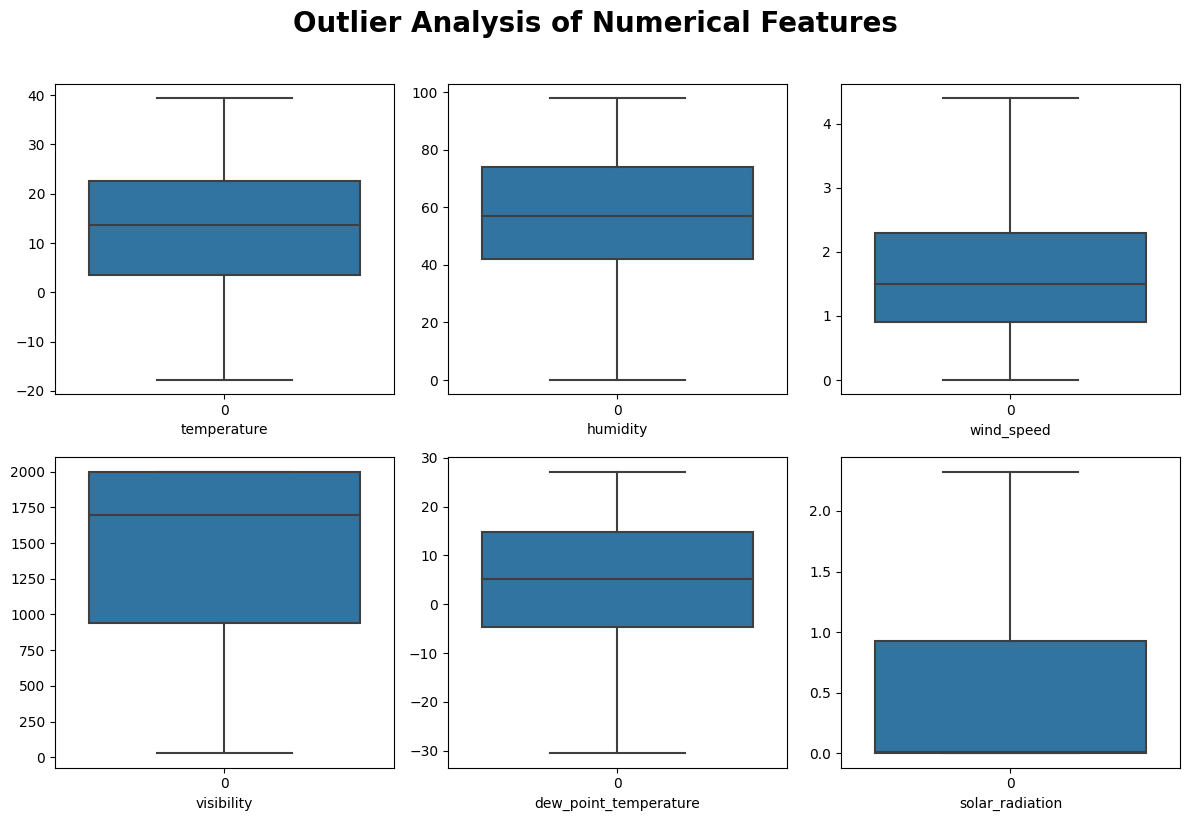

In [52]:
# Let's check the boxplot after treating outliers

plt.figure(figsize=(12,8))

plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)            # subplot of 2 rows and 3 columns

  # countplot
  sns.boxplot(df_bike[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

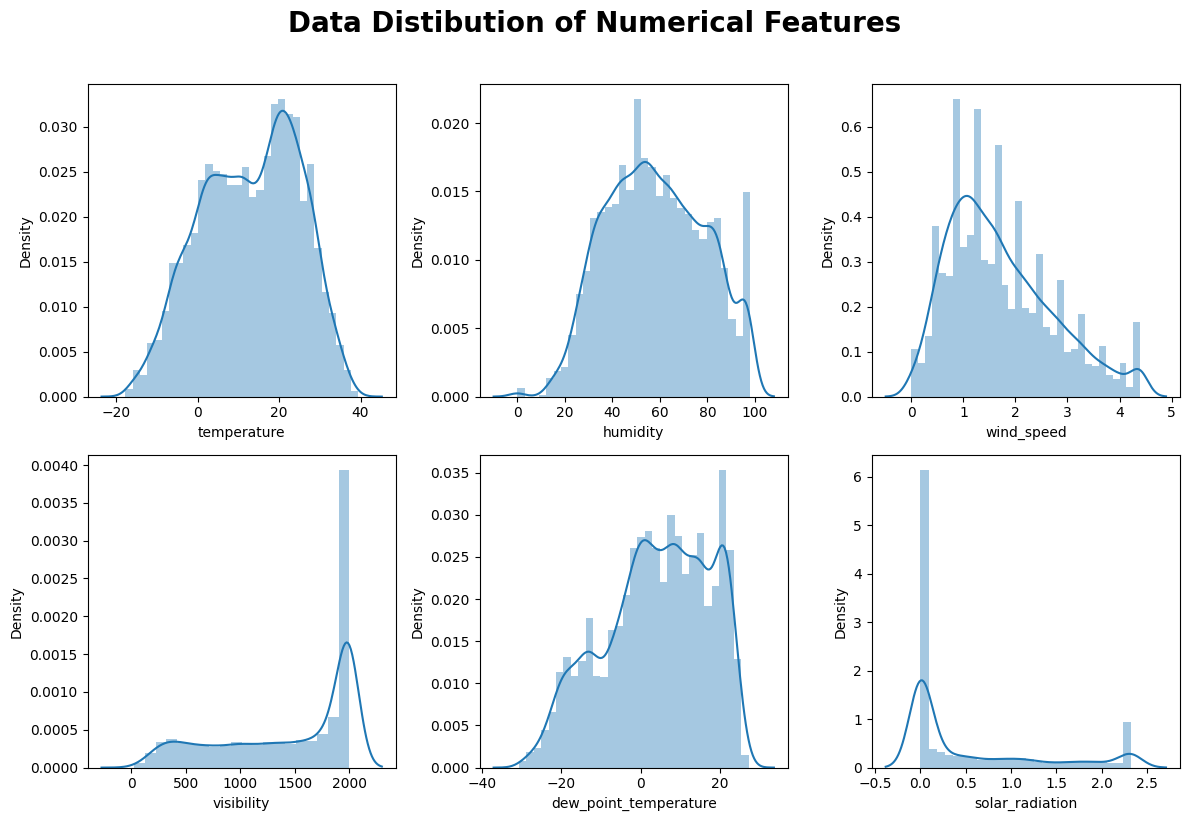

In [53]:
# Check the distribution after treating outliers.

plt.figure(figsize=(12,8))

plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                       # subplots 2 rows, 3 columns

  # dist plots
  sns.distplot(df_bike[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout() 

*   We have treated the numerical features by using the clipping methods.
*   We have checked the distribution of the numerical features and found that all features has been normalized







##### What all outlier treatment techniques have you used and why did you use those techniques?

**Clipping Method: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.**

# **5.2: Distribution of Target Variable - Rented Bike Count**

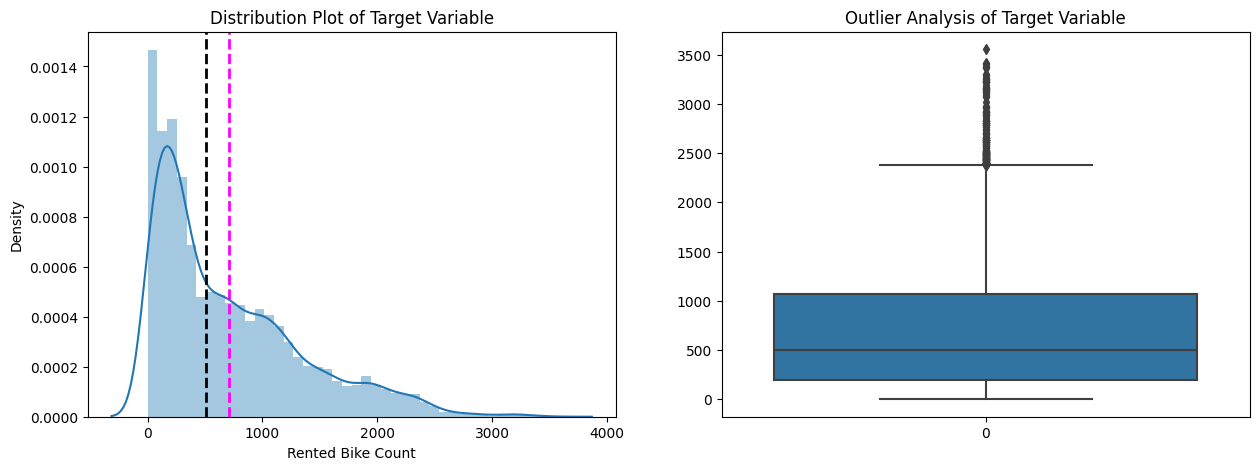

In [54]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(df_bike['rented_bike_count'], hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line
dist.axvline(df_bike['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(df_bike['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(df_bike.rented_bike_count, ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

*   Distribution plot clearly shows that rented bike count is slightely skewed in right side, we will require normal distribution of the same we will treat it using different methods. 
*   Box plot shows some outliers are present in rented bike count 



<Axes: ylabel='Density'>

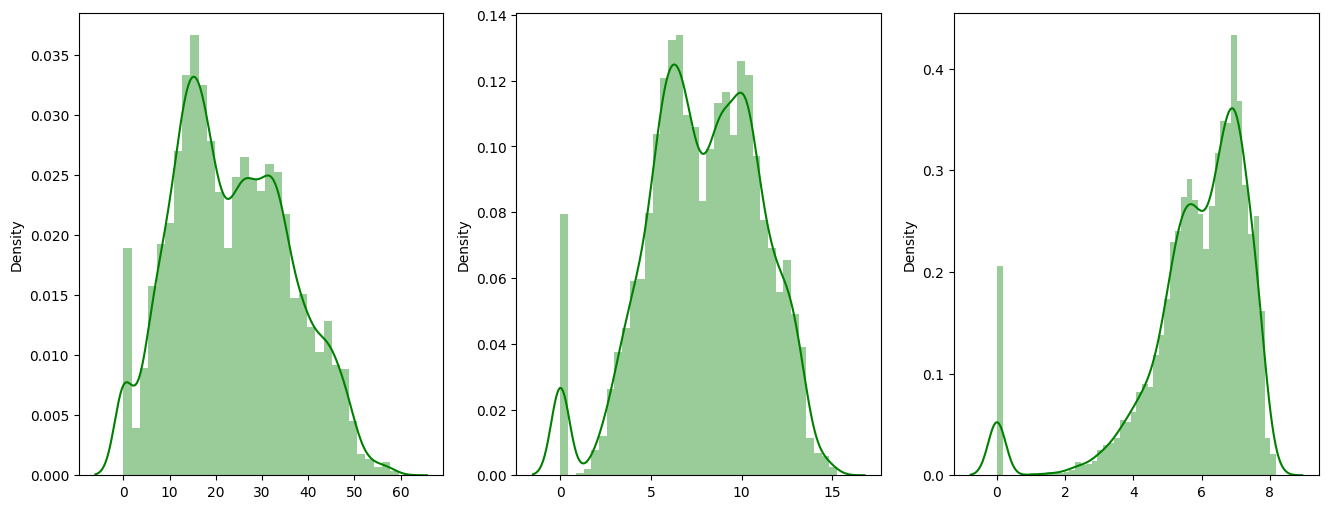

In [55]:
# Let's check the best transformation method for our target variables

f, axes = plt.subplots(1, 3,figsize=(16,6))
sns.distplot(x=np.sqrt(df_bike['rented_bike_count']),color='g',ax=axes[0])
sns.distplot(x=np.cbrt(df_bike['rented_bike_count']), color = 'g', ax = axes[1])
sns.distplot(x=np.log1p(df_bike['rented_bike_count']), color = 'g', ax = axes[2])


*   We can see that by using sqrt transformation target variable follows proper pattern of normal distribution




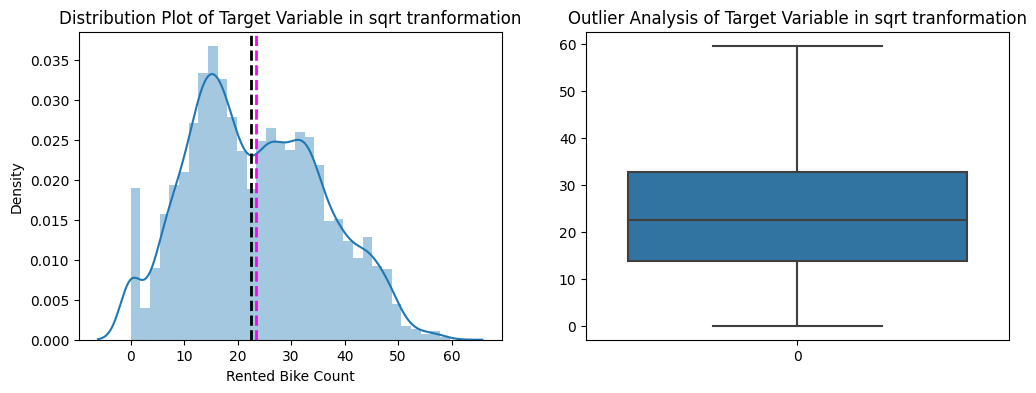

In [56]:
# We will consider sqrt method , lets check using the box plot
fig, ax = plt.subplots(1,2 , figsize = (12,4))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(df_bike['rented_bike_count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# mean line
dist.axvline(np.sqrt(df_bike['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(np.sqrt(df_bike['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.sqrt(df_bike.rented_bike_count), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

*   We found that there is no any outlier present in target variable after the sqrt transformation 

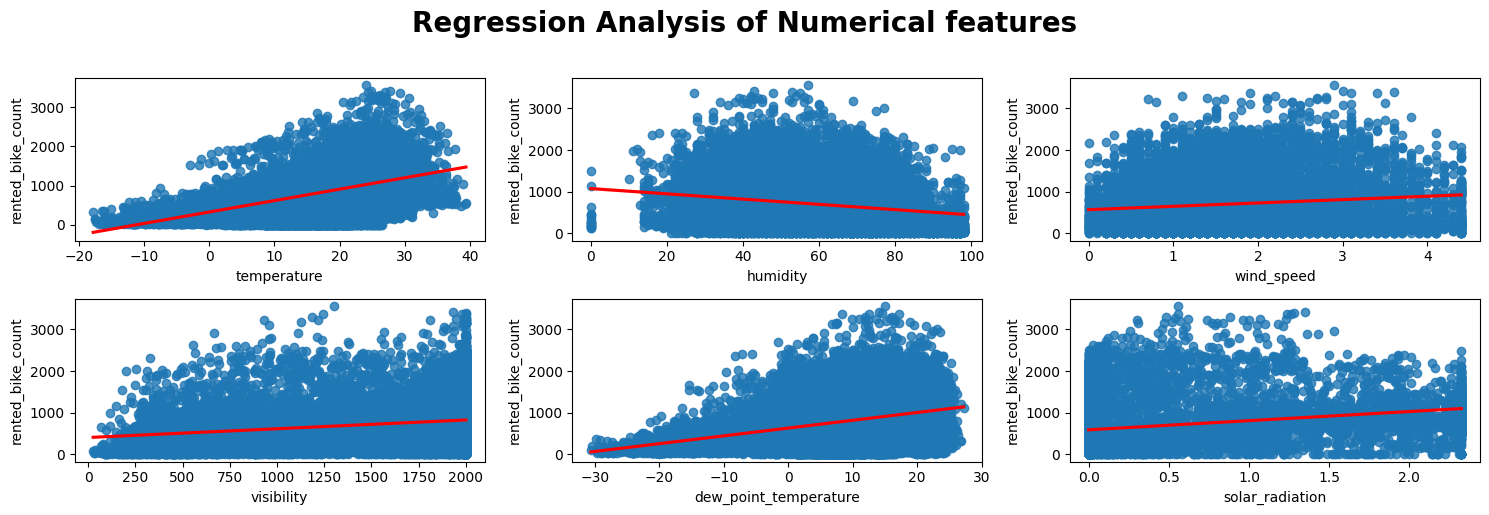

In [57]:
# Manipulate Features to minimize feature correlation and create new features
# Checking linearity of numerical features with target variables

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                     # subplots of 2 rows and 3 columns

  # regression plots
  sns.regplot(x=df_bike[col], y='rented_bike_count', data=df_bike, line_kws={"color":"r"})
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()



*   Most of the variables are positively co-related with target variables




<Axes: >

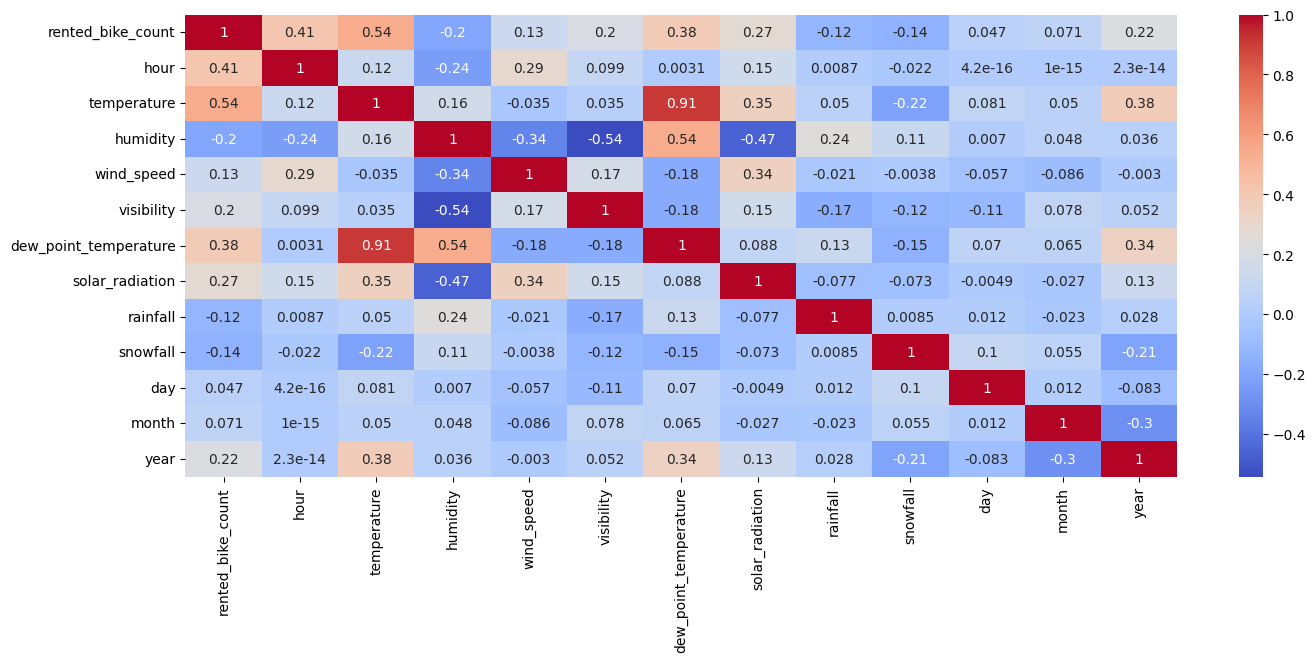

In [58]:
# Correlation Heatmap visualization code

plt.figure(figsize=(16,6))
sns.heatmap(df_bike.corr(), annot=True, cmap='coolwarm')  

*   Dew point temperature is highly co-related with temperature and dew point temperature is less co-relation with target variable hence we will drop this column 



In [59]:
#Dropping the column 
df_bike.drop('dew_point_temperature', axis = 1, inplace = True)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

*   Feature engineering is the process of creating new features from existing ones to improve the performance of a machine-learning model. This involves transforming raw data into a more useful and informative form, by either creating new features from the existing data or selecting only the most relevant features from the raw data.




## VIF - 
(Variance Inflation Factor) analysis is a statistical method used to identify multicollinearity in a set of predictor variables. Multicollinearity is a situation where two or more predictor variables in a regression model are highly correlated with each other, meaning that they provide redundant information about the response variable.

In [60]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

  # For each x, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  vif["features"] = x.columns
  
  return vif

In [61]:
# Let's calculate VIF 
calc_vif(df_bike[[i for i in df_bike.describe().columns]])

VIF Factor           features
0     4.152630  rented_bike_count
1     5.055598               hour
2     4.967449        temperature
3    24.956820           humidity
4     5.052784         wind_speed
5    10.660305         visibility
6     2.904267    solar_radiation
7     1.110419           rainfall
8     1.147299           snowfall
9     4.419318                day
10    4.744662              month
11   64.674491               year

In [62]:
# VIF for year is too large , so we wil drop the column from the dataset
df_bike.drop('year', axis = 1, inplace = True)

In [63]:
# Let's calculate VIF 
calc_vif(df_bike[[i for i in df_bike.describe().columns]])

VIF Factor           features
0     4.112963  rented_bike_count
1     4.717261               hour
2     4.455828        temperature
3     7.106271           humidity
4     4.833217         wind_speed
5     5.554467         visibility
6     2.368061    solar_radiation
7     1.104537           rainfall
8     1.136376           snowfall
9     3.859202                day
10    4.640307              month



*   This are all the total final numerical variables we will consider for model building




#### 2. Feature Selection 

##### What all feature selection methods have you used  and why?

*   We have usied VIF method for selection of numerical features for model building



### 3. Categorical Encoding
Encoding is a technique in feature engineering that is used to convert categorical variables into numerical values that can be used by machine learning algorithms.

In [64]:
# Encode your categorical columns
catagorical_features

['hour',
 'seasons',
 'holiday',
 'functioning_day',
 'day',
 'month',
 'year',
 'weekday']

In [65]:
# Removing year and weekday from this list which have been removed from dataframe
catagorical_features.remove('year')
catagorical_features.remove('weekday')

In [66]:
# Check Unique Values for each categorical variable.
for i in catagorical_features:
  print("No. of unique values in",i,"is",df_bike[i].nunique())

No. of unique values in hour is 24
No. of unique values in seasons is 4
No. of unique values in holiday is 2
No. of unique values in functioning_day is 2
No. of unique values in day is 31
No. of unique values in month is 12


In [67]:
# Numerical Encoding for holiday and functioning_day

df_bike['holiday'] = df_bike['holiday'].map({'Holiday': 1, 'No Holiday': 0})
df_bike['functioning_day'] = df_bike['functioning_day'].map({'Yes': 1, 'No': 0})

In [68]:
# One Hot Encoding

# One-hot encode the 'seasons' feature
onehot_hourcat = pd.get_dummies(df_bike['seasons'], prefix='seasons')

#Droping the original features 'seasons'
df_bike.drop('seasons', axis = 1, inplace = True)

# concatenate the one-hot encoded season feature with the rest of the data
df_bike = pd.concat([df_bike, onehot_hourcat], axis=1)

In [69]:
df_bike.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'holiday',
       'functioning_day', 'day', 'month', 'weekday', 'hour_cat',
       'seasons_Autumn', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter'],
      dtype='object')

In [70]:
# We will drop weekday and Hour_Cat because we have taken this column only for EDA purpose

In [71]:
df_bike.drop('weekday', axis = 1, inplace = True)
df_bike.drop('hour_cat', axis = 1, inplace = True)

In [72]:
df_bike.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'holiday',
       'functioning_day', 'day', 'month', 'seasons_Autumn', 'seasons_Spring',
       'seasons_Summer', 'seasons_Winter'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

*   One-hot encoding: creates a binary column for each unique category, with a value of 1 indicating the presence of the category and 0 indicating the absence.
*   Numerical encoding used for holiday and functioning day 



### 5. Data Splitting

In [73]:
x = df_bike.drop('rented_bike_count', axis=1)
y= np.sqrt(df_bike['rented_bike_count'])  

# Split your data to train and test. Choose Splitting ratio wisely.
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=2)

print(x_train.shape)
print(x_test.shape)


(6832, 16)
(1928, 16)


### 6. Data Scaling

In [74]:
# Scaling your data
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

*   The StandardScaler method scales the features such that they have zero mean and unit variance. It works by subtracting the mean of each feature from its values and then dividing the result by its standard deviation. This ensures that each feature has a mean of zero and a standard deviation of one. The scaling is done independently for each feature, which means that the scaling of one feature does not depend on the scaling of another feature.




## ***6. ML Model Implementation***

## 6.1: Model Training

In [75]:
#Make 1st emply list to append the result at last
result = []

def predict(ml_model,model_name):
  '''
  We will pass the model and predict the value.
  Function will calculate all the result for evaluation metrics and append to the result list.
  Plotting Different graphs for test data
  '''

  # Fit the model
  model = ml_model.fit(x_train,y_train)

  #Predicting values
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Reverse the transformation on the predictions (If we need y_train_pred in original and transformed way)
  y_train_pred_original = np.power(y_train_pred, 2)
  y_test_pred_original = np.power(y_test_pred, 2)

  # Graph to best fit line
  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  # Evaluation metrics on train data
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*120)

  # Evaluation metrics on test data
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*100)

# graph --> actual vs predicted on test data
  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*100)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*100)

  # using the score from the performance metrics to create the final model_result.
  result.append({'model':model_name,
                  'train MSE':train_MSE,
                  'test MSE':test_MSE,
                  'train RMSE':train_RMSE,
                  'test RMSE':test_RMSE,
                  'train MAE':train_MAE,
                  'test MAE':test_MAE,
                  'train R2':train_r2,
                  'test R2':test_r2,
                  'train Adj R2':train_adj_r2,
                  'test Adj R2':test_adj_r2})

### ML Model - 1 - Linear Regression

train MSE : 54.964
train RMSE : 7.414
train MAE : 5.709
train R2 : 0.645
train Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------
test MSE : 50.172
test RMSE : 7.083
test MAE : 5.404
test R2 : 0.676
test Adj R2 : 0.674
----------------------------------------------------------------------------------------------------


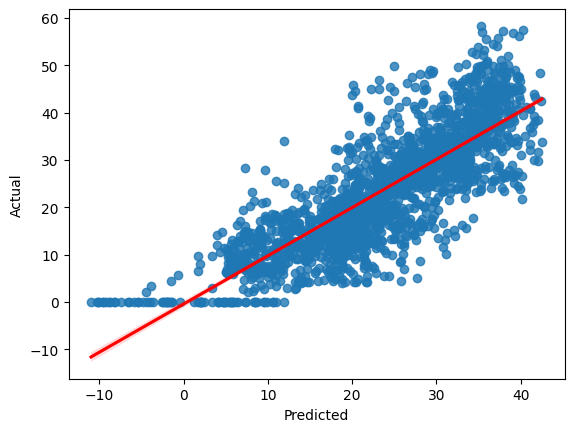

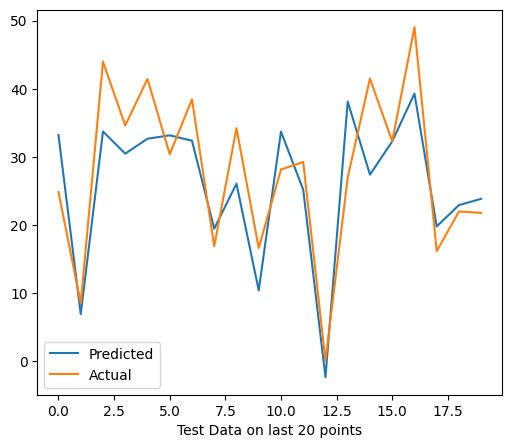

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  33.192684  6.875679  33.713896  30.460889  32.649951
error      -8.393490  1.609602  10.263371   4.136799   8.786748
----------------------------------------------------------------------------------------------------


In [76]:
# ML Model - 1 Implementation
predict(LinearRegression(), 'LinearRegression')

# Predict on the model

### ML Model - 2 - Lasso (L1 Regularization)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



*   Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization technique used in linear regression models. It helps to reduce the complexity of the model and improve its generalization ability by penalizing the magnitude of coefficients of the features.




train MSE : 55.127
train RMSE : 7.425
train MAE : 5.719
train R2 : 0.644
train Adj R2 : 0.644
------------------------------------------------------------------------------------------------------------------------
test MSE : 50.402
test RMSE : 7.099
test MAE : 5.416
test R2 : 0.675
test Adj R2 : 0.672
----------------------------------------------------------------------------------------------------


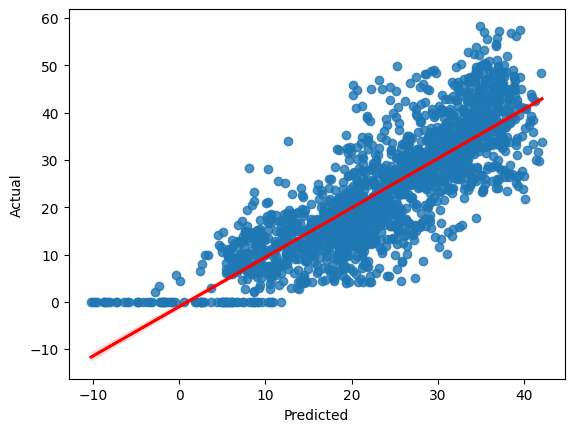

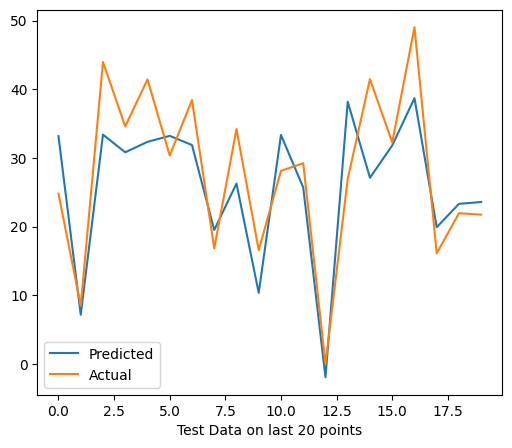

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  33.178505  7.175359  33.399448  30.828372  32.348867
error      -8.379312  1.309923  10.577819   3.769316   9.087831
----------------------------------------------------------------------------------------------------


In [77]:
# Visualizing evaluation Metric Score chart
predict(Lasso(alpha=0.1, max_iter=10000), 'Lasso')

### ML Model - 3 - Ridge (L2 Regularization)

*   Ridge Regression is a type of regularized linear regression that aims to solve the problem of multicollinearity and overfitting by adding a penalty term to the loss function. The penalty term is the L2 regularization term (also known as the weight decay term), which adds a penalty proportional to the square of the magnitude of the coefficients.


train MSE : 54.964
train RMSE : 7.414
train MAE : 5.709
train R2 : 0.645
train Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------
test MSE : 50.172
test RMSE : 7.083
test MAE : 5.404
test R2 : 0.676
test Adj R2 : 0.674
----------------------------------------------------------------------------------------------------


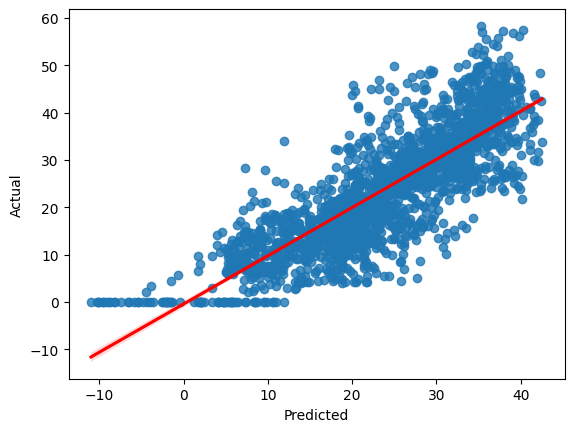

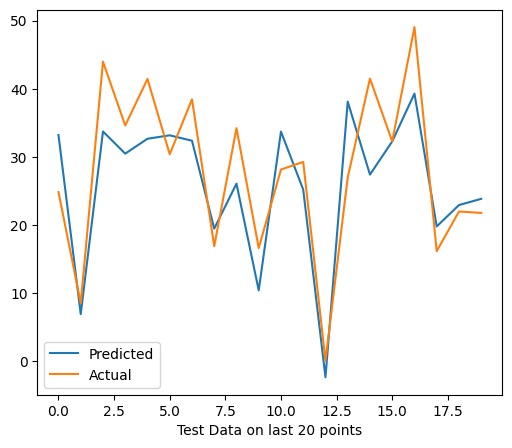

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  33.192604  6.875938  33.713889  30.460853  32.649613
error      -8.393410  1.609344  10.263378   4.136835   8.787085
----------------------------------------------------------------------------------------------------


In [79]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
predict(Ridge(alpha=0.1, max_iter=10000), 'Ridge')


### ML Model - 4 - Elastic Net

*   ElasticNet is a linear regression algorithm that combines both L1 (Lasso) and L2 (Ridge) regularization techniques. L1 and L2 regularization are methods used to prevent overfitting by adding penalty terms to the loss function that the algorithm minimizes. Lasso adds a penalty proportional to the absolute value of the coefficients, while Ridge adds a penalty proportional to the square of the coefficients.




train MSE : 55.451
train RMSE : 7.447
train MAE : 5.75
train R2 : 0.642
train Adj R2 : 0.641
------------------------------------------------------------------------------------------------------------------------
test MSE : 50.887
test RMSE : 7.134
test MAE : 5.443
test R2 : 0.672
test Adj R2 : 0.669
----------------------------------------------------------------------------------------------------


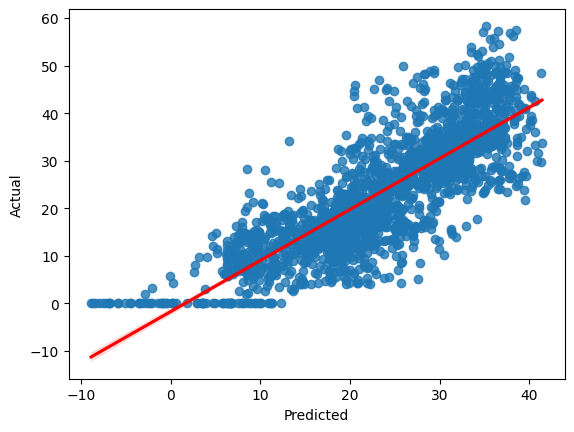

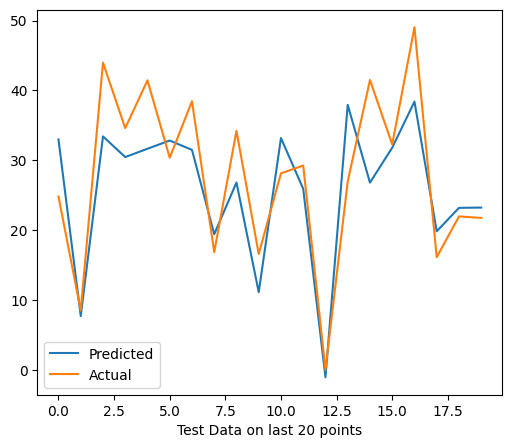

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  32.977310  7.693840  33.410667  30.454205  31.646534
error      -8.178116  0.791442  10.566600   4.143483   9.790165
----------------------------------------------------------------------------------------------------


In [80]:
# Visualizing the elastic net model
predict(ElasticNet(alpha=0.1, max_iter=10000), 'Elastic Net')

### ML Model - 5 - Decision Tree

*   A decision tree is a tree-like model used in machine learning to make predictions or decisions by breaking down a set of rules or conditions into smaller and smaller sub-conditions, based on the values of the input features.

*   Each node in the tree represents a test on a feature, and each branch represents the outcome of the test. The final branches of the tree, called the leaves, represent the class predictions or decisions. The tree is built recursively by finding the best feature to split the data based on the information gain or decrease in impurity at each node.




train MSE : 16.015
train RMSE : 4.002
train MAE : 2.751
train R2 : 0.897
train Adj R2 : 0.896
------------------------------------------------------------------------------------------------------------------------
test MSE : 20.376
test RMSE : 4.514
test MAE : 3.115
test R2 : 0.869
test Adj R2 : 0.867
----------------------------------------------------------------------------------------------------


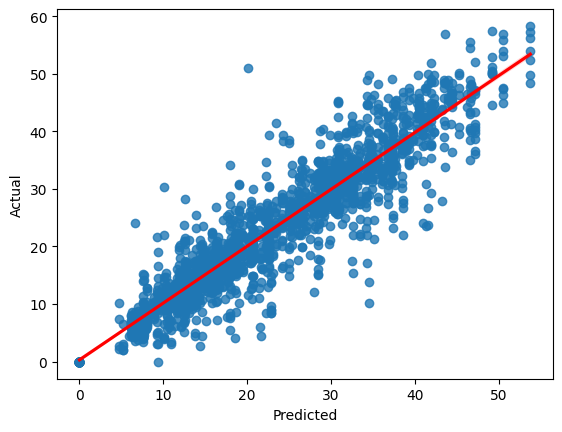

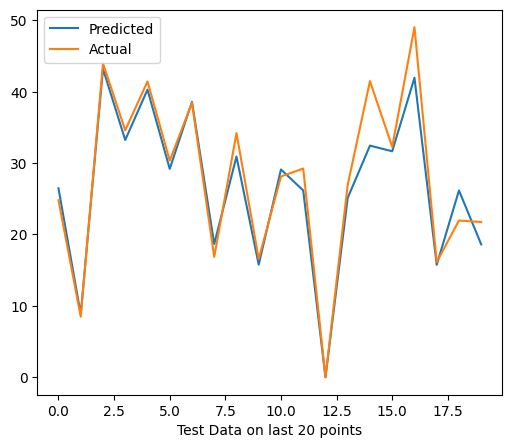

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  26.466979  8.831383  43.214002  33.239277  40.291833
error      -1.667785 -0.346102   0.763265   1.358410   1.144865
----------------------------------------------------------------------------------------------------


In [81]:
#Predicting and Visualizing the model
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=2), 'Decision Tree')

### ML Model - 6 - Random Forest

*   Random Forest is a machine learning algorithm that is used for both classification and regression tasks. It is a type of ensemble learning method, which combines multiple decision trees to form a more robust and accurate prediction model.


*   In a Random Forest model, several decision trees are trained independently on random subsets of the training data, and their outputs are combined to produce a final prediction. The randomness in the algorithm comes from both the subset of training data used to train each tree and the features selected for each split in each tree.



In [82]:
#Hyperparameter Tunning using GridSearchCV

In [83]:
param_grid = {'n_estimators': [50,80],       # number of trees in the ensemble
             'max_depth': [15,20],           # maximum number of levels allowed in each tree.
             'min_samples_split': [5,15],    # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.
          
# Visualize RandomForestRegressor model
rf = RandomForestRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [84]:
# best parameters from the grid search
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=15,
                      n_estimators=50)

train MSE : 7.908
train RMSE : 2.812
train MAE : 1.885
train R2 : 0.949
train Adj R2 : 0.949
------------------------------------------------------------------------------------------------------------------------
test MSE : 14.877
test RMSE : 3.857
test MAE : 2.561
test R2 : 0.904
test Adj R2 : 0.903
----------------------------------------------------------------------------------------------------


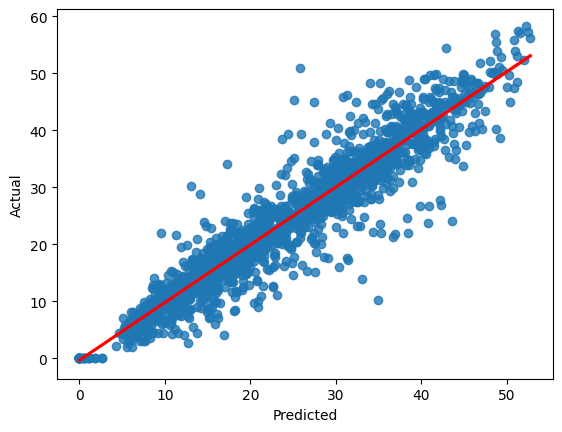

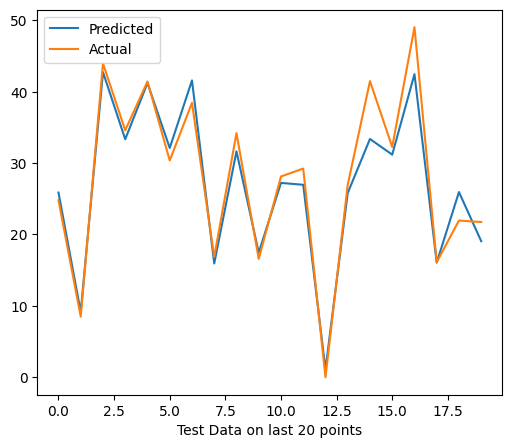

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  25.874543  9.149555  42.743891  33.349528  41.224101
error      -1.075349 -0.664273   1.233375   1.248160   0.212598
----------------------------------------------------------------------------------------------------


In [85]:
predict(rf_optimal_model, 'Random Forest')

## Model Explainability

In [86]:
# feature importance 
importances = rf_optimal_model.feature_importances_

# Creating a dictonary 
importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1       temperature            0.285062
0              hour            0.246753
9   functioning_day            0.164509
2          humidity            0.119893
6          rainfall            0.050641
15   seasons_Winter            0.040199
5   solar_radiation            0.038677
12   seasons_Autumn            0.014125
10              day            0.009550
4        visibility            0.008212
11            month            0.006920
3        wind_speed            0.006045
13   seasons_Spring            0.004979
7          snowfall            0.001682
8           holiday            0.001477
14   seasons_Summer            0.001275

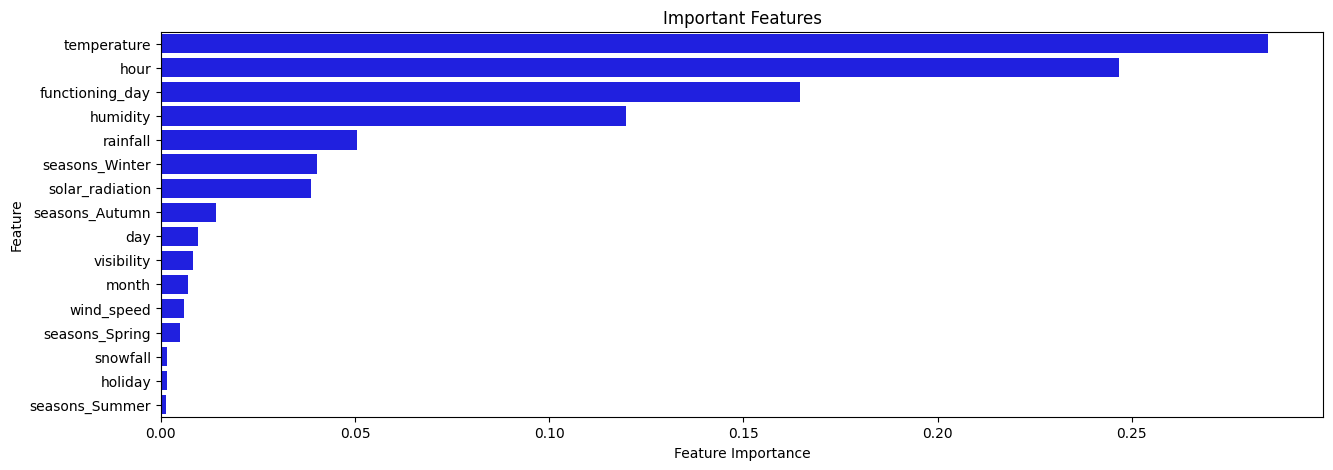

In [87]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

*   As per above graph it it very clear that important features are temp, hour, functioning day, humidity, solar radiation and rainfall


### ML Model - 7 - AdaBoost

*   AdaBoost works by combining multiple "weak" classifiers into a single "strong" classifier. The algorithm begins by training a base classifier on the original training data. It then iteratively trains new classifiers on the same data, but with a weighted focus on instances that were misclassified by the previous classifiers. The final model is a weighted sum of all the classifiers, where the weights are determined by the accuracy of each classifier.




train MSE : 2.071
train RMSE : 1.439
train MAE : 1.074
train R2 : 0.987
train Adj R2 : 0.987
------------------------------------------------------------------------------------------------------------------------
test MSE : 15.128
test RMSE : 3.889
test MAE : 2.554
test R2 : 0.902
test Adj R2 : 0.902
----------------------------------------------------------------------------------------------------


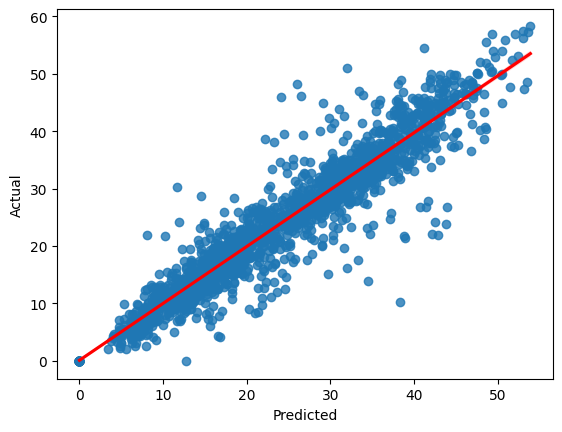

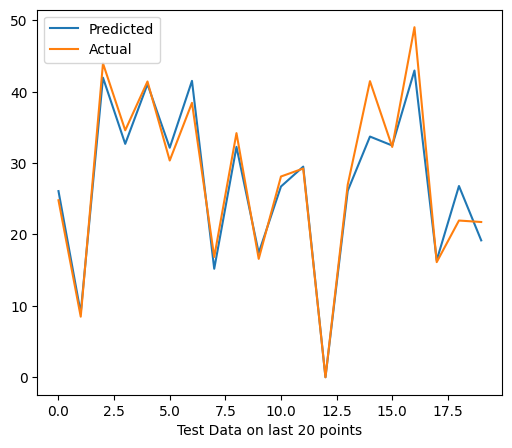

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  26.078603  9.009761  41.972627  32.698098  41.061870
error      -1.279409 -0.524479   2.004640   1.899590   0.374829
----------------------------------------------------------------------------------------------------


In [88]:
# Create a base decision tree regression model
dt = DecisionTreeRegressor(max_depth=12)

# Initialize the AdaBoost regression model
ada = AdaBoostRegressor(base_estimator=dt, n_estimators=60, learning_rate=1, random_state =33)

# Predict using function
predict(ada, 'AdaBoost')

### ML Model - 8 - Xtreme Gradient Boosting

*   Xtreme Gradient Boosting (XGBoost) is a popular machine learning algorithm for regression, classification, and ranking tasks. It is an extension of the gradient boosting method that uses a combination of gradient boosting and decision tree algorithms to produce highly accurate models.

*   XGBoost uses a "boosting" technique to combine multiple weak predictive models into a strong one. The algorithm works by sequentially adding decision trees to the model, where each subsequent tree tries to correct the errors made by the previous trees. The final model is a weighted average of all the trees, where the weights are determined by the accuracy of each tree.



In [89]:
param_grid = {'n_estimators': [300,500],     # number of trees in the ensemble
             'max_depth': [7,8],             # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
xgb = XGBRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(x, y)

[05:00:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:00:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:01:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:01:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:01:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:01:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:01:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:01:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[05:01:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [300, 500]},
             scoring='r2')

In [90]:
# Get the best parameters from the grid search
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, min_samples_leaf=3, min_samples_split=3,
             missing=nan, monotone_constraints=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

[05:08:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

train MSE : 0.0
train RMSE : 0.0
train MAE : 0.008
train R2 : 1.0
train Adj R2 : 1.0
------------------------------------------------------------------------------------------------------------------------
test MSE : 12.47
test RMSE : 3.531
test MAE : 2.305
test R2 : 0.92
test Adj R2 : 0.919
----------------------------------------------------------------------------------------------------


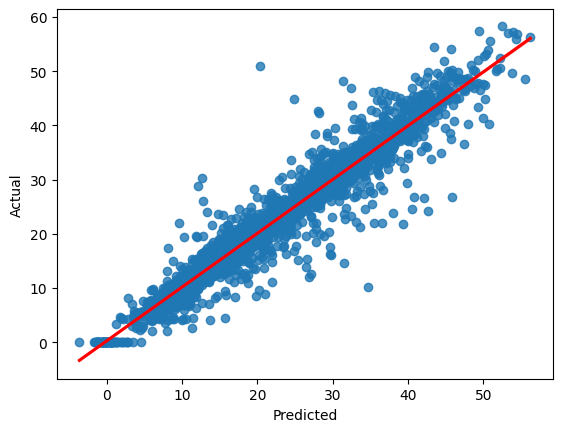

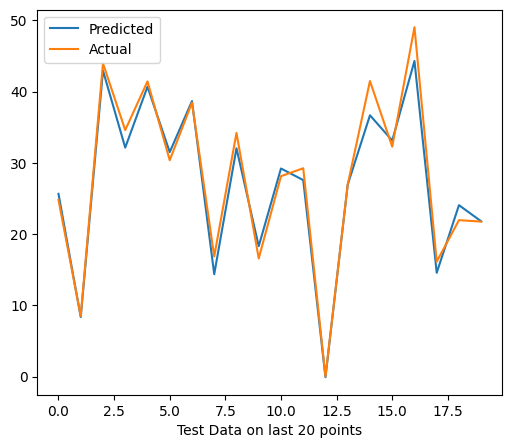

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  25.652178  8.359410  42.951656  32.136711  40.688137
error      -0.852984  0.125871   1.025611   2.460977   0.748562
----------------------------------------------------------------------------------------------------


In [91]:
predict(xgb_optimal_model, 'XGB')

## Model Explainability

In [92]:
# feature importance 
importances = xgb_optimal_model.feature_importances_

# Creating a dictonary 
importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
9   functioning_day            0.533737
15   seasons_Winter            0.347469
6          rainfall            0.042436
12   seasons_Autumn            0.013453
1       temperature            0.012183
0              hour            0.011300
2          humidity            0.008972
8           holiday            0.007083
5   solar_radiation            0.006876
14   seasons_Summer            0.006073
7          snowfall            0.003339
13   seasons_Spring            0.002052
11            month            0.001772
10              day            0.001656
4        visibility            0.000840
3        wind_speed            0.000758

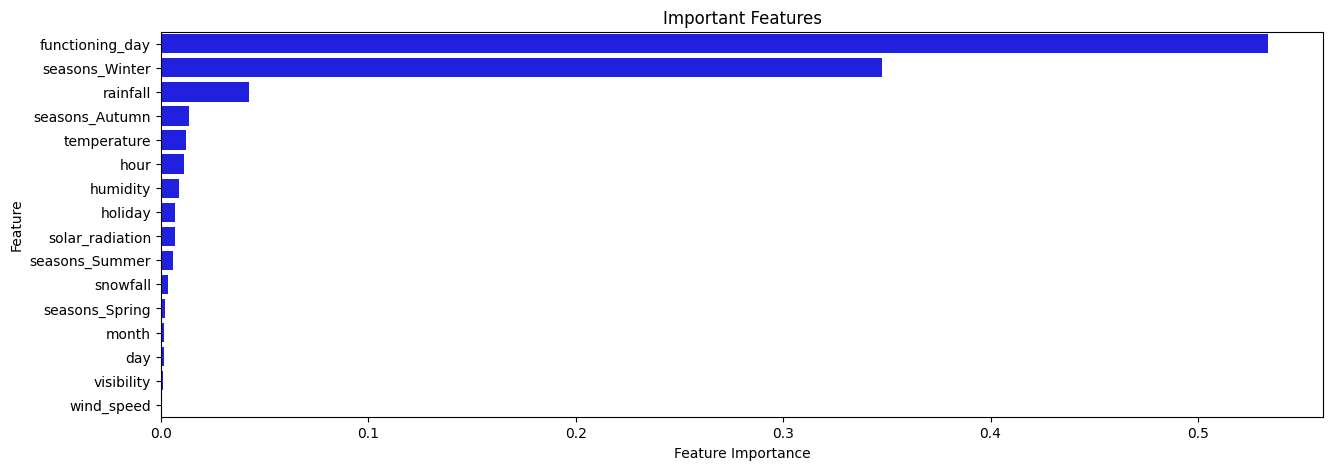

In [93]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()



*   As per above graph it it very clear that important features are functioning day, season winter and rainfall




## ML Model - 9 - Light GBM

*   Light GBM is similar to other gradient boosting frameworks such as XGBoost and CatBoost, but it differs in how it grows trees. Unlike other frameworks that grow trees leaf-wise, Light GBM grows trees in a depth-wise manner, which makes it much faster and more memory-efficient. Light GBM also uses a histogram-based approach to find the best split points, which further improves its efficiency.

In [94]:
param_grid = {'n_estimators': [600,800],     # number of trees in the ensemble
             'max_depth': [8,10],            # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [2,3]}      # minimum number of samples which can be stored in a tree leaf.

In [95]:
# Initialize the RandomForestRegressor model
lgb = LGBMRegressor()

In [96]:
# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(lgb, param_grid=param_grid, cv=5, scoring='r2')

In [97]:
# Fit the model to the training data
grid_search.fit(x, y)

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split


GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             scoring='r2')

In [98]:
# best parameters from the grid search
lgb_optimal_model = grid_search.best_estimator_
lgb_optimal_model

LGBMRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,
              n_estimators=600)

train MSE : 1.252
train RMSE : 1.119
train MAE : 0.796
train R2 : 0.992
train Adj R2 : 0.992
------------------------------------------------------------------------------------------------------------------------
test MSE : 11.585
test RMSE : 3.404
test MAE : 2.178
test R2 : 0.925
test Adj R2 : 0.925
----------------------------------------------------------------------------------------------------


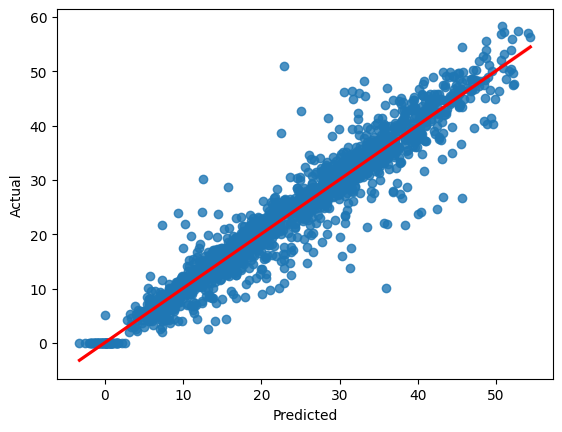

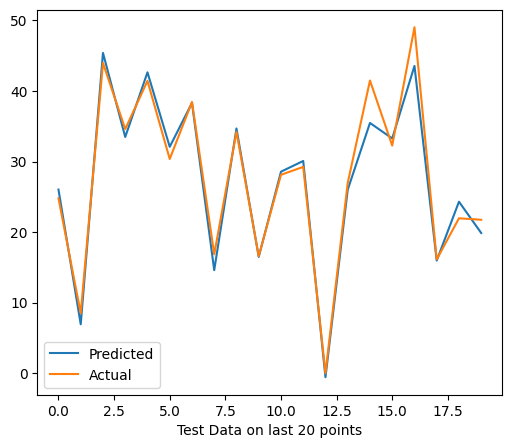

----------------------------------------------------------------------------------------------------
                6154      1394       4678       3516       3789
y_actual   24.799194  8.485281  43.977267  34.597688  41.436699
y_predict  26.025893  6.931175  45.402405  33.481537  42.645801
error      -1.226699  1.554106  -1.425139   1.116150  -1.209102
----------------------------------------------------------------------------------------------------


In [99]:
predict(lgb_optimal_model, 'LGB')

### Model Explainability 

In [100]:
# feature importance 
importances = lgb_optimal_model.feature_importances_

#Creating a dictonary 
importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1       temperature                3325
2          humidity                2452
0              hour                2319
4        visibility                2260
10              day                1843
3        wind_speed                1751
5   solar_radiation                1512
11            month                1188
6          rainfall                 429
8           holiday                 170
12   seasons_Autumn                 170
9   functioning_day                 165
7          snowfall                 136
13   seasons_Spring                 122
14   seasons_Summer                 111
15   seasons_Winter                  47

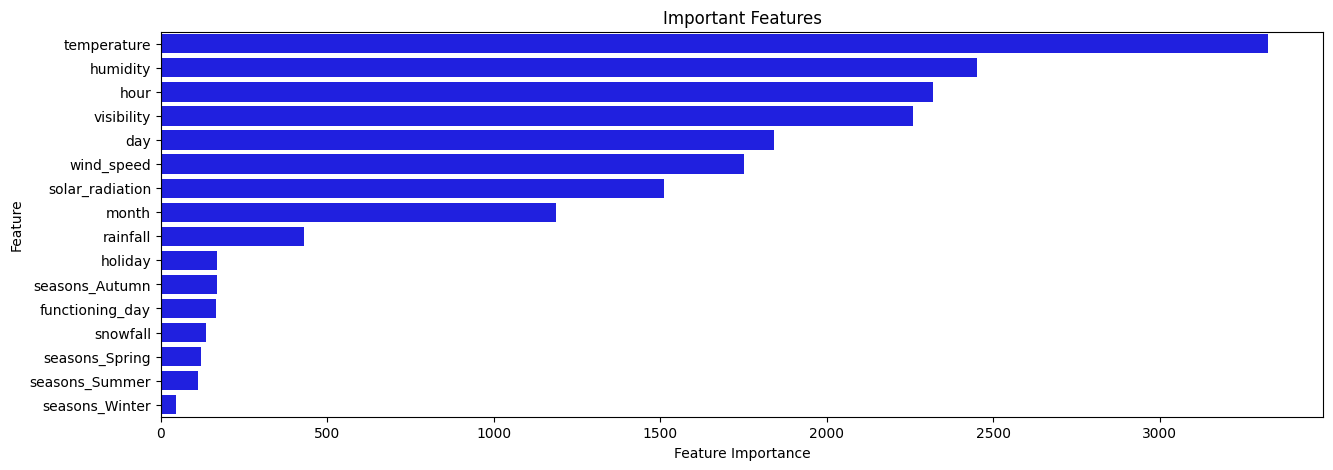

In [101]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar=sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

*   As per above graph it it very clear that important features are temperature, humidity, hour, visibility, day, windspeed, solar radiation, and month

## 7.0 Model Result 

In [102]:
# converting the model_result list into DataFrame
result = pd.DataFrame(result)

In [103]:
# sorting the values by test R2 score
result.sort_values(by='test R2', ascending=False)

model  train MSE  test MSE  train RMSE  test RMSE  train MAE  \
8               LGB      1.252    11.585       1.119      3.404      0.796   
7               XGB      0.000    12.470       0.000      3.531      0.008   
5     Random Forest      7.908    14.877       2.812      3.857      1.885   
6          AdaBoost      2.071    15.128       1.439      3.889      1.074   
4     Decision Tree     16.015    20.376       4.002      4.514      2.751   
0  LinearRegression     54.964    50.172       7.414      7.083      5.709   
2             Ridge     54.964    50.172       7.414      7.083      5.709   
1             Lasso     55.127    50.402       7.425      7.099      5.719   
3       Elastic Net     55.451    50.887       7.447      7.134      5.750   

   test MAE  train R2  test R2  train Adj R2  test Adj R2  
8     2.178     0.992    0.925         0.992        0.925  
7     2.305     1.000    0.920         1.000        0.919  
5     2.561     0.949    0.904         0.949        0.903  
6     2.554     0.987    0.902         0.987        0.902  
4     3.115     0.897    0.869         0.896        0.867  
0     5.404     0.645    0.676         0.645        0.674  
2     5.404     0.645    0.676         0.645        0.674  
1     5.416     0.644    0.675         0.644        0.672  
3     5.443     0.642    0.672         0.641        0.669

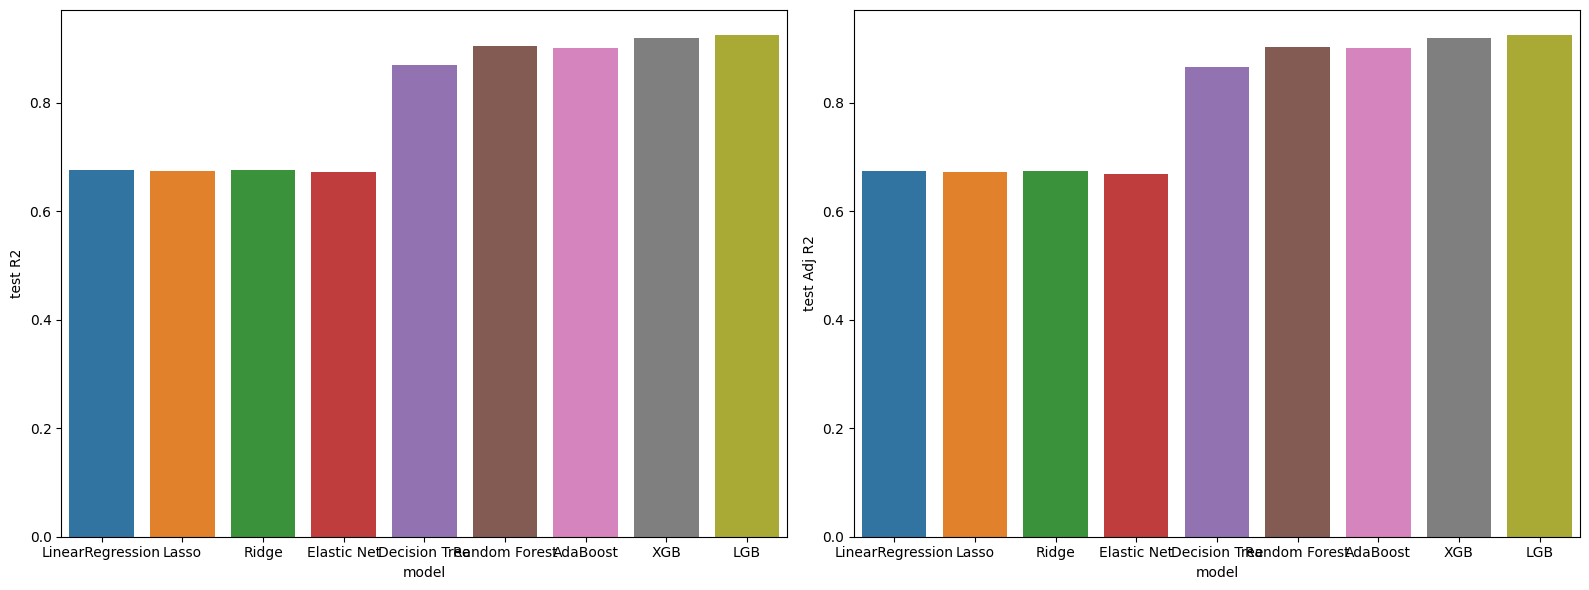

In [104]:
# plotting graph to compare model performance of all the models
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.barplot(x=result['model'], y=result['test R2'], ax=ax[0])           # Model Vs test R2
sns.barplot(x=result['model'], y=result['test Adj R2'], ax=ax[1])       # Model Vs test Adj R2
plt.tight_layout()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

*   The fit model to the dependent variables can be evaluated using R-Square measure

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

1.   From above graph we can select LGB and XGB Regressor.
2.   We will select LGB finally, Because LGB have lower RMSE value and highest R2 score on test data

3.   Also LGB is better suitable for larger dataset





# **Conclusion**

#### **In this project, we looked into a number of variables that affected the number of bicycle rentals. An overview of exploratory data analysis is provided below.**

1.   **It is orbserved that two pattern for Working and Non-working day. the first is for working days, where the rental count is highest between the hours of 8 a.m. and 5 p.m., and the second is for non-working days, where the rental count is more or less consistent throughout the day with a peak at around midday.**
2.   **Hour of the day: The number of bike rentals is largely connected with the time of day. As previously stated, the count peaks at peak hours on a working day and is mostly uniform during the day on a non-working day**

3.   **Temperature: Most people love biking in temperatures ranging from moderate to high. In the range of 32 to 36 degrees Celsius, we see the highest rental rates.**
4.   **Season: We see highest number bike rentals in Fall (July to September) and Summer (April to June)
Seasons and the lowest in Spring (January to March) season**

5.   **Weather: As one might anticipate, we have the largest number of bike rentals on clear days and the lowest on days that are snowy or rainy.**
6.   **Humidity: We see a reduction in the number of bike rentals as the humidity rises.**



7.   **The majority of bike is rented by the working professionals on office time and students at college time**
8.   **If business team planning for extra bikes and station peak timing should be consider**

9.   **And for maintainance and servicing should be done at night due low demand of bike at that time**
10.   **Above all models, I have chosen the Light GBM model. Time isn't a compelling factor in this situation; I want greater expectations for the rented_bike_count. Because of this, accuracy was increased by using several linear models, decision trees, Random Forests, and Gradient Boost approaches. To select a model, I compared R2 metrics. And LGB have lower RMSE value and highest R2 score on test data**










### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***